# PyCalcolAr
### Inizializzazione

In [1]:
# Importare le librerie utili per la creazione del codice
import pandas as pd
import numpy as np
import math 
from IPython.display import display

# Variabili utilizzate nel calcolo, da modificare manualmente dall'utente  
delay = 246

### Importazione files
### > file triplo36 (file di calibrazione dell'aria)

In [2]:
# definire il percorso del file
file_path = "../test_data/Triplo36.txt"

# definire la lista con gli indici delle colonne 
columns_names=['40F', 'err 40F', '38IC0', 'err 38IC0', '36IC1', 'err 36IC1', '36IC0', 'err 36IC0','36F', 'err 36F', 'gain IC0/IC1', 'err gain IC0/IC1', 'gain F/IC1', 'err gain F/IC1' , 'gain F/IC0', 'err gain F/IC0', '40F/36IC1', 'err 40F/36IC1 ', '40F/36F', 'err 40F/36F', '40F/36IC0', 'err 40F/36IC0' , '38IC0/36IC0', 'err 38IC0/36IC0', 'Run', 'Path']

# trasformare le colonne in dati numerici (ad eccezione delle colonne 'Run' e 'Path')
columns_numeric=['40F', 'err 40F', '38IC0', 'err 38IC0', '36IC1', 'err 36IC1', '36IC0', 'err 36IC0','36F', 'err 36F', 'gain IC0/IC1', 'err gain IC0/IC1', 'gain F/IC1', 'err gain F/IC1' , 'gain F/IC0', 'err gain F/IC0', '40F/36IC1', 'err 40F/36IC1 ', '40F/36F', 'err 40F/36F', '40F/36IC0', 'err 40F/36IC0' , '38IC0/36IC0', 'err 38IC0/36IC0']

# importare il file utilizzando caratteri separatori (sep = '\t|,') '\t' = tab, ',' = virgola
airpipette_data = pd.read_csv(file_path, header = None, names = columns_names, sep = '\t|,', engine = 'python')

# eliminare i caratteri "{}" dalle colonne relative all'errore
airpipette_data = airpipette_data.replace(["{","}"], ["",""], regex=True)

# convertire tutte le colonne del dataframe a numeric (float64)
for i in columns_numeric:
    airpipette_data[i] = pd.to_numeric(airpipette_data[i])
    
# definire un dataframe con le "colonne utili" (foglio airpipette_data)
airpipette_data = airpipette_data[['40F', 'err 40F', '38IC0', 'err 38IC0', '36IC1', 'err 36IC1', '36IC0', 'err 36IC0','36F', 'err 36F', 'Run', 'Path']]

# stampare il dataframe 'airpipette_data'
print("Air pipette initial imported data:")

# dividere la colonna 'Run' in due colonne: nome del run e data/ora
run_split = airpipette_data['Run'].str.split(" run on ")

# formattare la colonna con il nome del run (del campione) in una serie pandas e associarle un nome 
run_name = run_split.str[0]
run_name = run_name.replace(["'"], [""], regex=True)
run_name.name = 'Run_Name'

# formattare la colonna con la data e l'ora in una serie pandas e associarle un nome, convertire il dato in datetime64
dataora = run_split.str[1]
dataora.name = 'Date_Time'
dataora = pd.to_datetime(dataora)

# concatenare le due nuove colonne all'inizio del dataframe airpipette_data
airpipette_data = pd.concat([run_name, dataora, airpipette_data], axis = 1)

# eliminare la colonna 'Run' (non più utilizzata)
airpipette_data.drop('Run',axis=1, inplace=True)

# Conversione valore da count a V per tutti IC0,IC1 e relativi errori... (n / 62415000)

#airpipette_data.loc[:,'38IC0'] = airpipette_data.loc[:,'38IC0'].values / 62415000
#airpipette_data.loc[:,'err 38IC0'] = airpipette_data.loc[:,'err 38IC0'].values / 62415000
#airpipette_data.loc[:,'36IC1'] = airpipette_data.loc[:,'36IC1'].values / 62415000
#airpipette_data.loc[:,'err 36IC1'] = airpipette_data.loc[:,'err 36IC1'].values / 62415000
#airpipette_data.loc[:,'36IC0'] = airpipette_data.loc[:,'36IC0'].values / 62415000
#airpipette_data.loc[:,'err 36IC0'] = airpipette_data.loc[:,'err 36IC0'].values / 62415000
#airpipette_data.loc[:,'36F'] = airpipette_data.loc[:,'36F'].values / 62415000
#airpipette_data.loc[:,'err 36F'] = airpipette_data.loc[:,'err 36F'].values / 62415000

#airpipette_data

display(airpipette_data)

Air pipette initial imported data:


,Run_Name,Date_Time,40F,err 40F,38IC0,err 38IC0,36IC1,err 36IC1,36IC0,err 36IC0,36F,err 36F,Path
0,Sample Name,2015-10-06 10:33:00,0.73900,0.00400,49900.0,58.0,72000.0,230.0,259000.0,160.0,144000.0,1300.0,Raw data stored in - C:\Nu Noble\Results\Data...
1,Sample Name,2015-10-06 10:52:00,1.22000,0.00041,49700.0,60.0,75600.0,200.0,258000.0,160.0,251000.0,870.0,Raw data stored in - C:\Nu Noble\Results\Data...
2,Sample Name,2015-10-06 11:23:00,1.22000,0.00051,49800.0,51.0,76800.0,190.0,259000.0,150.0,251000.0,910.0,Raw data stored in - C:\Nu Noble\Results\Data...
3,Sample Name,2015-10-08 10:13:00,0.75800,0.00400,49700.0,55.0,66600.0,230.0,258000.0,140.0,144000.0,1100.0,Raw data stored in - C:\Nu Noble\Results\Data...
4,Sample Name,2015-10-08 10:27:00,1.09000,0.00036,43300.0,63.0,60800.0,170.0,224000.0,130.0,220000.0,1400.0,Raw data stored in - C:\Nu Noble\Results\Data...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,Sample Name,2020-06-23 11:02:00,1.65538,0.00053,55318.2,79.0,307546.0,250.0,298052.0,240.0,347513.0,1100.0,Raw data stored in - C:\Nu Noble\Results\Data...
830,Sample Name,2020-06-24 09:25:00,1.65331,0.00043,55167.7,90.0,305585.0,220.0,297394.0,300.0,349141.0,1300.0,Raw data stored in - C:\Nu Noble\Results\Data...
831,Sample Name,2020-06-24 09:50:00,1.65039,0.00049,55606.8,82.0,306701.0,200.0,299474.0,260.0,347983.0,1300.0,Raw data stored in - C:\Nu Noble\Results\Data...
832,Sample Name,2020-06-24 10:08:00,1.64847,0.00056,55592.8,63.0,306848.0,260.0,299066.0,230.0,346598.0,1400.0,Raw data stored in - C:\Nu Noble\Results\Data...


### > file run4 e run22 (file di misura)

In [3]:
# definire la lista con gli indici delle colonne 
column_names_run4 = ['40Ar F', 'err40Ar F', '38Ar IC0', 'err38Ar IC0', '36Ar IC1', 'err36Ar IC1','38Ar F', 'err38Ar F','36Ar IC0', 'err36Ar IC0', '39Ar F', 'err39Ar F', '37Ar IC0', 'err37Ar IC0' , '35Cl IC1', 'err35Cl IC1', '39Ar IC0',  'err39Ar IC0',  '37Ar IC1', 'err37Ar IC1', 'gainF/IC0', 'err gainF/IC0' , 'gainIC0/IC1', 'err gainIC0/IC1', '40F/36IC1',  'err40F/36IC1',  '40F/36IC0' ,'err40F/36IC0', 'Run', 'Path']
column_names_run22 = ['40Ar F', 'err40Ar F', '38Ar IC0', 'err38Ar IC0', '36Ar IC1', 'err36Ar IC1','38Ar F', 'err38Ar F','36Ar IC0', 'err36Ar IC0', '39Ar F', 'err39Ar F', '37Ar IC0', 'err37Ar IC0' , '35Cl IC1', 'err35Cl IC1', 'gainIC0/IC1', 'err gainIC0/IC1' , '40F/36IC1',  'err40F/36IC1',  '40F/36IC0' ,'err40F/36IC0', 'Run', 'Path']

# definire il percorso dei file
file_path_4 = "../test_data/Run4.txt"
file_path_22 = "../test_data/Run22.txt"

# importare i file run
df_data_4 = pd.read_csv(file_path_4, header = None, index_col= False, names = column_names_run4, sep = '\t|,', engine = 'python')
df_data_22 = pd.read_csv(file_path_22, header = None, index_col= False, names = column_names_run22, sep = '\t|,', engine = 'python')

# eliminare i caratteri "{}" dalle colonne
df_data_4 = df_data_4.replace(["{", "}"], ["", ""], regex=True)
df_data_22 = df_data_22.replace(["{", "}"], ["", ""], regex=True)

# definire nome delle colonne che contengono dati numerici
colnames_numeric_4 = ['40Ar F', 'err40Ar F', '38Ar IC0', 'err38Ar IC0', '36Ar IC1', 'err36Ar IC1','38Ar F', 'err38Ar F','36Ar IC0', 'err36Ar IC0', '39Ar F', 'err39Ar F', '37Ar IC0', 'err37Ar IC0' , '35Cl IC1', 'err35Cl IC1', '39Ar IC0',  'err39Ar IC0',  '37Ar IC1', 'err37Ar IC1', 'gainF/IC0', 'err gainF/IC0' , 'gainIC0/IC1', 'err gainIC0/IC1', '40F/36IC1',  'err40F/36IC1',  '40F/36IC0' ,'err40F/36IC0']   
colnames_numeric_22 = ['40Ar F', 'err40Ar F', '38Ar IC0', 'err38Ar IC0', '36Ar IC1', 'err36Ar IC1','38Ar F', 'err38Ar F','36Ar IC0', 'err36Ar IC0', '39Ar F', 'err39Ar F', '37Ar IC0', 'err37Ar IC0' , '35Cl IC1', 'err35Cl IC1', 'gainIC0/IC1', 'err gainIC0/IC1' , '40F/36IC1',  'err40F/36IC1',  '40F/36IC0' ,'err40F/36IC0']

# convertire tutte le colonne del dataframe df_data_4 a numeric (float64)
for i in colnames_numeric_4:
    df_data_4[i] = pd.to_numeric(df_data_4[i])

# convertire tutte le colonne del dataframe df_data_22 a numeric (float64)
for i in colnames_numeric_22:
    df_data_22[i] = pd.to_numeric(df_data_22[i])

df_data = pd.concat([df_data_4, df_data_22], axis=0)

# dividere la colonna 'Run' in due colonne: nome del run e data/ora
run_split = df_data['Run'].str.split(" run on ")

# formattare la colonna con il nome del run (del campione) in una serie pandas e associarle un nome 
run_name = run_split.str[0]
run_name = run_name.replace(["'"], [""], regex=True)
run_name.name = 'Run_Name'

# formattare la colonna con la data e l'ora in una serie pandas e associarle un nome, convertire il dato in datetime64
dataora = run_split.str[1]
dataora.name = 'Date_Time'
dataora = pd.to_datetime(dataora)

# concatenare le due nuove colonne all'inizio del dataframe df_data
df_data = pd.concat([run_name, dataora, df_data], axis = 1)

# eliminare la colonna 'Run' (non più utilizzata)
df_data.drop('Run',axis=1, inplace=True)

display(df_data)

,Run_Name,Date_Time,40Ar F,err40Ar F,38Ar IC0,err38Ar IC0,36Ar IC1,err36Ar IC1,38Ar F,err38Ar F,...,err37Ar IC1,gainF/IC0,err gainF/IC0,gainIC0/IC1,err gainIC0/IC1,40F/36IC1,err40F/36IC1,40F/36IC0,err40F/36IC0,Path
0,fishcanyon bt stp1,2015-04-08 16:03:00,0.847000,0.000370,0.000493,3.700000e-07,0.002460,3.900000e-06,0.000047,0.000015,...,6.600000e-09,0.396,0.064,1.060000,0.0018,345.000,0.57,325.000,0.21,Raw data stored in - C:\Nu Noble\Results\Data...
1,fishcanyon bt stp2,2015-04-08 16:33:00,2.300000,0.000870,0.001540,8.500000e-07,0.006340,9.200000e-06,0.000107,0.000013,...,1.000000e-08,2.670,0.018,1.030000,0.0015,363.000,0.55,354.000,0.19,Raw data stored in - C:\Nu Noble\Results\Data...
2,Sample Name,2015-04-08 17:28:00,1.080000,0.000350,0.000750,5.000000e-07,0.002850,5.400000e-06,0.000037,0.000012,...,8.200000e-09,4.340,0.029,1.070000,0.0021,378.000,0.72,354.000,0.20,Raw data stored in - C:\Nu Noble\Results\Data...
3,Sample Name,2015-04-09 11:39:00,0.089300,0.000040,0.000059,1.300000e-07,0.000215,2.700000e-07,0.000009,0.000012,...,4.400000e-08,2.160,0.260,1.210000,0.0020,416.000,0.55,345.000,0.41,Raw data stored in - C:\Nu Noble\Results\Data...
4,Sample Name,2015-04-09 12:11:00,0.578000,0.000270,0.000329,3.000000e-07,0.001530,2.400000e-06,0.000050,0.000011,...,6.400000e-09,48700.000,48000.000,1.110000,0.0018,378.000,0.61,340.000,0.24,Raw data stored in - C:\Nu Noble\Results\Data...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,BAL-T12 LG ST2,2020-06-23 15:31:00,0.426141,0.000120,0.003709,2.600000e-06,0.000883,7.200000e-07,0.004290,0.000017,...,NaN,NaN,NaN,0.997925,0.0012,482.535,0.42,483.538,0.46,Raw data stored in - C:\Nu Noble\Results\Data...
1334,BAL-T12 LG ST3,2020-06-23 15:57:00,0.224427,0.000066,0.003784,2.800000e-06,0.000268,4.000000e-07,0.004378,0.000017,...,NaN,NaN,NaN,1.003020,0.0022,838.663,1.30,836.139,1.30,Raw data stored in - C:\Nu Noble\Results\Data...
1335,BAL-T12 LG ST6,2020-06-23 17:08:00,0.421204,0.000130,0.004853,3.600000e-06,0.000743,7.200000e-07,0.005579,0.000016,...,NaN,NaN,NaN,1.008230,0.0013,567.014,0.58,562.386,0.54,Raw data stored in - C:\Nu Noble\Results\Data...
1336,BAL-T12 ST7,2020-06-23 17:26:00,0.585912,0.000160,0.011360,1.100000e-05,0.000572,6.300000e-07,0.012936,0.000016,...,NaN,NaN,NaN,1.015770,0.0016,1024.300,1.20,1008.400,1.20,Raw data stored in - C:\Nu Noble\Results\Data...


### Filtrare dati misurati per data e ora per selezionare un solo campione
#### Verificare correttezza della selezione nel dataframe visualizzato!!

In [4]:
# filtrare il dataframe per data 
filter_data_min = pd.Timestamp(year=2015, month=10, day=6, hour=0)
filter_data_max = pd.Timestamp(year=2015, month=10, day=6, hour=20)

df_data = df_data[(df_data['Date_Time'] > filter_data_min) & (df_data['Date_Time'] < filter_data_max)]
df_data.reset_index(drop=True, inplace=True)
df_data.sort_values('Date_Time', axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last')

print("\n   > df_data:")
display(df_data)

# opzione con selezione manuale da lista dropdown
# filtrare il dataframe per data, prendendo una sola riga 
# import ipywidgets as widgets
# usando to_list()[-1] si seleziona l'ultimo elemento della lista, cioè la calbrazione più recente, come default
# data_w = widgets.Dropdown(options=airpipette_data['Date_Time'].to_list(),
#                  value=airpipette_data['Date_Time'].to_list()[-1],
#                  description='Date_Time of calibration:',
#                  disabled=False)
# data_w = data_w.value

# opzione selezione automatica della calibrazione più recente disponibile tra quelle più vecchie della misura
sample_min = min(df_data['Date_Time'].to_list())
older_calibration_df = airpipette_data[airpipette_data['Date_Time'] < sample_min]
data_w = max(older_calibration_df['Date_Time'].to_list())

airpipette_data_filtered = airpipette_data[airpipette_data['Date_Time'] == data_w]
calibration_data = airpipette_data_filtered 

print("\n\n   > calibration_data:")
display(calibration_data)


   > df_data:


,Run_Name,Date_Time,40Ar F,err40Ar F,38Ar IC0,err38Ar IC0,36Ar IC1,err36Ar IC1,38Ar F,err38Ar F,...,err37Ar IC1,gainF/IC0,err gainF/IC0,gainIC0/IC1,err gainIC0/IC1,40F/36IC1,err40F/36IC1,40F/36IC0,err40F/36IC0,Path
3,mca11 pos3-8 stp1,2015-10-06 13:42:00,10.30760,0.01400,0.004647,5.900000e-06,0.004950,1.200000e-05,0.004082,0.000031,...,NaN,NaN,NaN,2.95981,0.0079,2082.31,5.8,703.528,1.30,Raw data stored in - C:\Nu Noble\Results\Data...
4,mca11 pos3-8 stp2,2015-10-06 14:10:00,6.08782,0.00350,0.002162,1.800000e-06,0.001768,4.200000e-06,0.002081,0.000020,...,NaN,NaN,NaN,3.11228,0.0077,3444.21,8.4,1106.650,1.10,Raw data stored in - C:\Nu Noble\Results\Data...
0,mca11 pos3-8 stp3,2015-10-06 14:38:00,0.84500,0.00023,0.000354,4.600000e-07,0.000348,6.100000e-07,0.000388,0.000014,...,1.700000e-07,0.984,0.0022,3.52000,0.0066,2420.00,4.3,689.000,0.51,Raw data stored in - C:\Nu Noble\Results\Data...
1,mca11 pos3-8 stp4,2015-10-06 15:02:00,1.89000,0.00099,0.000884,7.900000e-07,0.000980,2.100000e-06,0.000928,0.000014,...,2.800000e-07,0.994,0.0013,3.32000,0.0074,1920.00,4.3,579.000,0.45,Raw data stored in - C:\Nu Noble\Results\Data...
2,mca11 pos3-8 stp5,2015-10-06 15:30:00,3.01000,0.00200,0.001360,1.200000e-06,0.001460,3.300000e-06,0.001450,0.000015,...,3.400000e-07,1.010,0.0012,3.26000,0.0078,2060.00,4.9,633.000,0.63,Raw data stored in - C:\Nu Noble\Results\Data...
5,mca11 pos3-8 stp6,2015-10-06 15:46:00,5.32851,0.00300,0.001797,1.800000e-06,0.001363,3.000000e-06,0.001878,0.000019,...,NaN,NaN,NaN,3.26808,0.0080,3908.99,9.0,1196.110,1.40,Raw data stored in - C:\Nu Noble\Results\Data...




   > calibration_data:


,Run_Name,Date_Time,40F,err 40F,38IC0,err 38IC0,36IC1,err 36IC1,36IC0,err 36IC0,36F,err 36F,Path
2,Sample Name,2015-10-06 11:23:00,1.22,0.00051,49800.0,51.0,76800.0,190.0,259000.0,150.0,251000.0,910.0,Raw data stored in - C:\Nu Noble\Results\Data...


### Operazioni derivate dal file di calibrazione triplo36 (da foglio Excel sample_data)
#### per calcolare 1sig_rel (errore relativo) = err / 36Ar (IC0 o IC1 in base al collettore usato)

In [5]:
value_err36IC0 = float(calibration_data['err 36IC0'].values)
value_36IC0 = float(calibration_data['36IC0'].values)
sig_rel_36IC0 = float(value_err36IC0 / value_36IC0)

print ('1sig_rel_36IC0', sig_rel_36IC0)

1sig_rel_36IC0 0.0005791505791505791


In [6]:
value_err36IC1 = float(calibration_data['err 36IC1'].values)
value_36IC1 = float(calibration_data['36IC1'].values)
sig_rel_36IC1 = float(value_err36IC1 / value_36IC1)

print ('1sig_rel_36IC1', sig_rel_36IC1)

1sig_rel_36IC1 0.0024739583333333332


In [7]:
value_err36F = float(calibration_data['err 36F'].values)
value_36F = float(calibration_data['36F'].values)
sig_rel_36F = float(value_err36F / value_36F)

print ('1sig_rel_36F', sig_rel_36F)

1sig_rel_36F 0.0036254980079681275


In [8]:
# calcolo gain F/IC0

value_36F = float(calibration_data['36F'].values)
value_36IC0 = float(calibration_data['36IC0'].values)
gain_F_IC0 = float(value_36F / value_36IC0)

print ('gain F/IC0', gain_F_IC0)

gain F/IC0 0.9691119691119691


In [9]:
# calcolo l'errore assoluto del gain F/IC0

sig_abs_F_ICO = gain_F_IC0 * (pow(sig_rel_36IC0, 2) + pow(sig_rel_36F, 2))**(1/2)

print ('sig_abs_F/ICO', sig_abs_F_ICO)

sig_abs_F/ICO 0.003558060141541943


In [10]:
# calcolo gain F/IC1 

value_36F = float(calibration_data['36F'].values)
value_36IC1 = float(calibration_data['36IC1'].values)
gain_F_IC1 = float(value_36F / value_36IC1)

print ('gain F/IC1: ', gain_F_IC1)

gain F/IC1:  3.2682291666666665


In [11]:
# calcolo l'errore assoluto del gain F/IC1

sig_abs_F_IC1 = gain_F_IC1 * (pow(sig_rel_36IC1, 2) + pow(sig_rel_36F, 2))**(1/2)

print ('sig_abs_F/IC1', sig_abs_F_IC1)

sig_abs_F/IC1 0.014344773333381244


In [12]:
# calcolo 36IC0 correzione gain

corr_gain_36IC0 = value_36IC0 * gain_F_IC0

print ('corr_gain_36IC0: ', corr_gain_36IC0) 

corr_gain_36IC0:  251000.0


In [13]:
# calcolo 40/36 correzione

value_40F = float(calibration_data['40F'].values)
B = 62415000 #aggiungere descrizione della constante
corr_40_36 = (value_40F * B) / corr_gain_36IC0

print ('corr_40_36: ', corr_40_36)

corr_40_36:  303.37171314741033


In [14]:
# calcolo l'errore assoluto del 40/36 correzione

sig_abs_40_36 = corr_40_36 * (pow(sig_rel_36F, 2) + pow(calibration_data['err 40F'].values / calibration_data['40F'].values, 2))**(1/2)

print ('sig_abs_40/36', sig_abs_40_36)

sig_abs_40/36 [1.10716076]


In [15]:
# calcolo source frax 

source_frax = float(corr_40_36 / 298.56)

print ('source_frax: ', source_frax)

source_frax:  1.0161164025569747


In [16]:
# calcolo l'errore assoluto di source frax

sig_abs_source_frax = source_frax * (sig_abs_40_36 / corr_40_36)

print ('sig_abs_source_frax', sig_abs_source_frax)

sig_abs_source_frax [0.00370834]


#### Definire tutti i parametri delle tabelle (A) e (B) del file Excel CalcolAr
### Tabella: BACKGROUND SPECTROMETER
#### (da modificare manualmente dall'utente, valori misurati 4/5 di volte l'anno)

In [17]:
update_data = pd.Timestamp(year=2021, month=1, day=23)

background_spectrometer_dict = {'Update date': [update_data, np.nan],
                                'Background 40Ar': [0.0020, 0.1],
                                'Background 39Ar': [0.0030, 0.1],
                                'Background 38Ar': [0.0010, 0.1],
                                'Background 37Ar': [0.0040, 0.2],
                                'Background 36Ar': [0.0005, 0.1]}

background_spectrometer_df = pd.DataFrame.from_dict(background_spectrometer_dict, orient='index')
background_spectrometer_df.columns = ['value', 'relative error']

display(background_spectrometer_df)

,value,relative error
Update date,2021-01-23 00:00:00,NaN
Background 40Ar,0.002,0.1
Background 39Ar,0.003,0.1
Background 38Ar,0.001,0.1
Background 37Ar,0.004,0.2
Background 36Ar,0.0005,0.1


### Tabella: IRRADIATIONS CONSTANTS 
#### (valori costanti, non sono da modificare)

In [18]:
irradiations_constants_dict = {'Atmospheric Ratio': [298.56, np.nan],
                                '(36Ar/37Ar) Ca': [0.000255, 0.015],
                                '(38Ar/37Ar) Ca': [0.00027, 0.015],
                                '(39Ar/37Ar) Ca': [0.00067, 0.015],
                                'Lambda Ar37 [1/d]': [0.019748, np.nan],
                                'Lambda Ar40 [1/Ma]': [0.0005543, np.nan],
                                'Interference 40K': [0.033, 0.01],
                                'Coefficient 39Ar for J': [143, np.nan],
                                'Coefficient Ca/K': [1.94, np.nan],
                                'Coefficient Cl/K': [0.178, np.nan]}

irradiations_constants_df = pd.DataFrame.from_dict(irradiations_constants_dict, orient='index')
irradiations_constants_df.columns = ['value', 'relative error']

display(irradiations_constants_df)

,value,relative error
Atmospheric Ratio,298.560000,NaN
(36Ar/37Ar) Ca,0.000255,0.015
(38Ar/37Ar) Ca,0.000270,0.015
(39Ar/37Ar) Ca,0.000670,0.015
Lambda Ar37 [1/d],0.019748,NaN
Lambda Ar40 [1/Ma],0.000554,NaN
Interference 40K,0.033000,0.010
Coefficient 39Ar for J,143.000000,NaN
Coefficient Ca/K,1.940000,NaN
Coefficient Cl/K,0.178000,NaN


### Tabella: IRRADIATIONS
#### (da modificare manualmente dall'utente)

In [19]:
# sample_weight, da modificare manuelmente dall'utente (cambia per ogni campione) 
sample_weight = 0.00034

# J_factor e J_factor_errors, da modificare manuelmente dall'utente (cambia per ogni campione) 
J_factor = 0.0011422
J_factor_errors = 0.0005

# sensitivity, da modificare manuelmente dall'utente (valore misurato un paio di volte l'anno) 
sensitivity = 0.0000000000337 

# i seguenti calcoli vengono svolti dal codice
gain_F_IC0 = gain_F_IC0 # già calcolato precedentemente  

gain_rel_uncertainty_errors = calibration_data['err 40F'].values / calibration_data['err 36F'].values
gain_rel_uncertainty = gain_rel_uncertainty_errors / gain_F_IC0

measured_40Ar_36Ar_pipettes = calibration_data['40F'].values / calibration_data['36IC1'].values

gain_corrected_40Ar_36Ar_pipettes = measured_40Ar_36Ar_pipettes / gain_F_IC0
gain_corrected_40Ar_36Ar_pipettes_errors = gain_corrected_40Ar_36Ar_pipettes / irradiations_constants_df.loc['Atmospheric Ratio', 'value']

pipette_rel_uncertainty = sig_abs_source_frax  
total_fractionation_uncertainty = sig_abs_source_frax 


irradiations_dict = {'Sample weight [g]': [sample_weight, np.nan],
                     'J factor': [J_factor, J_factor_errors],
                     'Sensitivity (mL/mV)': [sensitivity, np.nan],
                     'Gain F/IC0': [gain_F_IC0, np.nan],
                     'Gain rel uncertainty': [gain_rel_uncertainty[0], gain_rel_uncertainty_errors[0]],
                     'Measured 40Ar/36Ar pipettes': [measured_40Ar_36Ar_pipettes[0], np.nan],
                     'Gain corrected 40Ar/36Ar pipettes': [gain_corrected_40Ar_36Ar_pipettes[0], gain_corrected_40Ar_36Ar_pipettes_errors[0]], 
                     'Pipette rel uncertainty': [pipette_rel_uncertainty[0], np.nan],
                     'Total fractionation uncertainty': [total_fractionation_uncertainty[0], np.nan]} 

irradiations_df = pd.DataFrame.from_dict(irradiations_dict, orient='index')
irradiations_df.columns = ['value', 'relative error']

display(irradiations_df)

,value,relative error
Sample weight [g],3.400000e-04,NaN
J factor,1.142200e-03,5.000000e-04
Sensitivity (mL/mV),3.370000e-11,NaN
Gain F/IC0,9.691120e-01,NaN
Gain rel uncertainty,5.783022e-07,5.604396e-07
Measured 40Ar/36Ar pipettes,1.588542e-05,NaN
Gain corrected 40Ar/36Ar pipettes,1.639172e-05,5.490262e-08
Pipette rel uncertainty,3.708336e-03,NaN
Total fractionation uncertainty,3.708336e-03,NaN


### Operazioni foglio Excel CalcolAr = file PyCalcolAr
#### Le operazione verranno aggiunte in un unico dataframe di risultati simile a quelle del file Excel CalcolAr

In [20]:
# creare il dataframe input_data 
input_data_df = pd.DataFrame() 

# colonna Time costante 
input_data_df.loc[:, 'Time'] = pd.Series(1 for k in range(0, len(df_data.index)))

# 6° cella del codice (da modificare manualmente dall'utente)
input_data_df.loc[:, 'Delay'] = pd.Series(delay for k in range(0, len(df_data.index)))

display(input_data_df)

,Time,Delay
0,1,246
1,1,246
2,1,246
3,1,246
4,1,246
5,1,246


### Input = online Regression

In [21]:
input_data_df.loc[:, '40Ar'] = df_data.loc[:, '40Ar F'].values * 1000
input_data_df.loc[:, 'err40Ar'] = df_data.loc[:, 'err40Ar F'].values * 1000

input_data_df.loc[:, '39Ar'] = df_data.loc[:, '39Ar F'].values * 1000
input_data_df.loc[:, 'err39Ar'] = df_data.loc[:, 'err39Ar F'].values * 1000

input_data_df.loc[:, '38Ar'] = df_data.loc[:, '38Ar IC0'].values * 1000
input_data_df.loc[:, 'err38Ar'] = df_data.loc[:, 'err38Ar F'].values * 1000

input_data_df.loc[:, '37Ar'] = df_data.loc[:, '37Ar IC0'].values * df_data.loc[:, 'gainF/IC0'].values * 1000
input_data_df.loc[:, 'err37Ar'] = df_data.loc[:, 'err37Ar IC0'].values * df_data.loc[:, 'gainF/IC0'].values * 1000

input_data_df.loc[:, '36Ar'] = df_data.loc[:, '36Ar IC0'].values * df_data.loc[:, 'gainF/IC0'].values * 1000
input_data_df.loc[:, 'err36Ar'] = df_data.loc[:, 'err36Ar IC0'].values * df_data.loc[:, 'gainF/IC0'].values * 1000

display(input_data_df)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,NaN,NaN
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,NaN,NaN
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,1.21032,0.000836
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,3.24044,0.001889
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,4.79750,0.003535
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,NaN,NaN


### Measured values corrected for mass spectrometer background

In [22]:
results_data = input_data_df

results_data.loc[:,'40Ar BC'] = results_data.loc[:, '40Ar'].values - (results_data.loc[:, '39Ar'].values * \
                                irradiations_constants_df.loc['Interference 40K', 'value']) - \
                                background_spectrometer_df.loc['Background 40Ar', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,NaN,NaN,10304.878470
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,NaN,NaN,6085.815177
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,1.21032,0.000836,844.773930
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,3.24044,0.001889,1889.565700
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,4.79750,0.003535,3009.248900
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,NaN,NaN,5326.709962


In [23]:
results_data.loc[:,'1sigma_abs40'] = (pow(results_data.loc[:, 'err40Ar'].values, 2) + \
                                      pow(background_spectrometer_df.loc['Background 40Ar', 'value'] * \
                                      background_spectrometer_df.loc['Background 40Ar', 'relative error'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,NaN,NaN,10304.878470,14.00
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,NaN,NaN,6085.815177,3.50
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,1.21032,0.000836,844.773930,0.23
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,3.24044,0.001889,1889.565700,0.99
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,4.79750,0.003535,3009.248900,2.00
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,NaN,NaN,5326.709962,3.00


In [24]:
results_data.loc[:,'1sigma_rel40'] = results_data.loc[:,'1sigma_abs40'].values / results_data.loc[:,'40Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,NaN,NaN,10304.878470,14.00,0.001359
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,NaN,NaN,6085.815177,3.50,0.000575
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,1.21032,0.000836,844.773930,0.23,0.000272
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,3.24044,0.001889,1889.565700,0.99,0.000524
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,4.79750,0.003535,3009.248900,2.00,0.000665
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,NaN,NaN,5326.709962,3.00,0.000563


In [25]:
results_data.loc[:,'39Ar BC'] = results_data.loc[:, '39Ar'].values - background_spectrometer_df.loc['Background 39Ar', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,NaN,NaN,10304.878470,14.00,0.001359,82.4070
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,NaN,NaN,6085.815177,3.50,0.000575,60.6886
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,1.21032,0.000836,844.773930,0.23,0.000272,6.7870
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,3.24044,0.001889,1889.565700,0.99,0.000524,13.0970
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,4.79750,0.003535,3009.248900,2.00,0.000665,22.6970
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,NaN,NaN,5326.709962,3.00,0.000563,54.4830


In [26]:
results_data.loc[:,'1sigma_abs39'] = (pow(results_data.loc[:, 'err39Ar'].values, 2) + \
                                      pow(background_spectrometer_df.loc['Background 39Ar', 'value'] * \
                                      background_spectrometer_df.loc['Background 39Ar', 'relative error'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,NaN,NaN,10304.878470,14.00,0.001359,82.4070,0.087001
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,NaN,NaN,6085.815177,3.50,0.000575,60.6886,0.036001
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,1.21032,0.000836,844.773930,0.23,0.000272,6.7870,0.015003
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,3.24044,0.001889,1889.565700,0.99,0.000524,13.0970,0.016003
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,4.79750,0.003535,3009.248900,2.00,0.000665,22.6970,0.020002
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,NaN,NaN,5326.709962,3.00,0.000563,54.4830,0.032001


In [27]:
results_data.loc[:,'1sigma_rel39'] = results_data.loc[:,'1sigma_abs39'].values / results_data.loc[:,'39Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,NaN,NaN,10304.878470,14.00,0.001359,82.4070,0.087001,0.001056
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,NaN,NaN,6085.815177,3.50,0.000575,60.6886,0.036001,0.000593
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,1.21032,0.000836,844.773930,0.23,0.000272,6.7870,0.015003,0.002211
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,3.24044,0.001889,1889.565700,0.99,0.000524,13.0970,0.016003,0.001222
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,4.79750,0.003535,3009.248900,2.00,0.000665,22.6970,0.020002,0.000881
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,NaN,NaN,5326.709962,3.00,0.000563,54.4830,0.032001,0.000587


In [28]:
results_data.loc[:,'38Ar BC'] = results_data.loc[:, '38Ar'].values - background_spectrometer_df.loc['Background 38Ar', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,NaN,NaN,10304.878470,14.00,0.001359,82.4070,0.087001,0.001056,4.64568
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,NaN,NaN,6085.815177,3.50,0.000575,60.6886,0.036001,0.000593,2.16130
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,1.21032,0.000836,844.773930,0.23,0.000272,6.7870,0.015003,0.002211,0.35300
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,3.24044,0.001889,1889.565700,0.99,0.000524,13.0970,0.016003,0.001222,0.88300
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,4.79750,0.003535,3009.248900,2.00,0.000665,22.6970,0.020002,0.000881,1.35900
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,NaN,NaN,5326.709962,3.00,0.000563,54.4830,0.032001,0.000587,1.79565


In [29]:
results_data.loc[:,'1sigma_abs38'] = (pow(results_data.loc[:, 'err38Ar'].values, 2) + \
                                      pow(background_spectrometer_df.loc['Background 38Ar', 'value'] * \
                                      background_spectrometer_df.loc['Background 38Ar', 'relative error'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,NaN,NaN,10304.878470,14.00,0.001359,82.4070,0.087001,0.001056,4.64568,0.031
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,NaN,NaN,6085.815177,3.50,0.000575,60.6886,0.036001,0.000593,2.16130,0.020
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,1.21032,0.000836,844.773930,0.23,0.000272,6.7870,0.015003,0.002211,0.35300,0.014
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,3.24044,0.001889,1889.565700,0.99,0.000524,13.0970,0.016003,0.001222,0.88300,0.014
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,4.79750,0.003535,3009.248900,2.00,0.000665,22.6970,0.020002,0.000881,1.35900,0.015
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,NaN,NaN,5326.709962,3.00,0.000563,54.4830,0.032001,0.000587,1.79565,0.019


In [30]:
results_data.loc[:,'1sigma_rel38'] = results_data.loc[:,'1sigma_abs38'].values / results_data.loc[:,'38Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,NaN,10304.878470,14.00,0.001359,82.4070,0.087001,0.001056,4.64568,0.031,0.006673
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,NaN,6085.815177,3.50,0.000575,60.6886,0.036001,0.000593,2.16130,0.020,0.009254
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,0.000836,844.773930,0.23,0.000272,6.7870,0.015003,0.002211,0.35300,0.014,0.039661
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,0.001889,1889.565700,0.99,0.000524,13.0970,0.016003,0.001222,0.88300,0.014,0.015855
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,0.003535,3009.248900,2.00,0.000665,22.6970,0.020002,0.000881,1.35900,0.015,0.011038
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,NaN,5326.709962,3.00,0.000563,54.4830,0.032001,0.000587,1.79565,0.019,0.010581


In [31]:
results_data.loc[:,'37Ar BC'] = results_data.loc[:, '37Ar'].values - background_spectrometer_df.loc['Background 37Ar', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,10304.878470,14.00,0.001359,82.4070,0.087001,0.001056,4.64568,0.031,0.006673,NaN
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,6085.815177,3.50,0.000575,60.6886,0.036001,0.000593,2.16130,0.020,0.009254,NaN
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,844.773930,0.23,0.000272,6.7870,0.015003,0.002211,0.35300,0.014,0.039661,0.087315
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,1889.565700,0.99,0.000524,13.0970,0.016003,0.001222,0.88300,0.014,0.015855,0.093710
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,3009.248900,2.00,0.000665,22.6970,0.020002,0.000881,1.35900,0.015,0.011038,0.101040
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,5326.709962,3.00,0.000563,54.4830,0.032001,0.000587,1.79565,0.019,0.010581,NaN


In [32]:
results_data.loc[:,'1sigma_abs37'] = (pow(results_data.loc[:, 'err37Ar'].values, 2) + \
                                      pow(background_spectrometer_df.loc['Background 37Ar', 'value'] * \
                                      background_spectrometer_df.loc['Background 37Ar', 'relative error'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,14.00,0.001359,82.4070,0.087001,0.001056,4.64568,0.031,0.006673,NaN,NaN
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,3.50,0.000575,60.6886,0.036001,0.000593,2.16130,0.020,0.009254,NaN,NaN
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,0.23,0.000272,6.7870,0.015003,0.002211,0.35300,0.014,0.039661,0.087315,0.000826
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,0.99,0.000524,13.0970,0.016003,0.001222,0.88300,0.014,0.015855,0.093710,0.000844
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,2.00,0.000665,22.6970,0.020002,0.000881,1.35900,0.015,0.011038,0.101040,0.000845
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,3.00,0.000563,54.4830,0.032001,0.000587,1.79565,0.019,0.010581,NaN,NaN


In [33]:
results_data.loc[:,'1sigma_rel37'] = results_data.loc[:,'1sigma_abs37'].values / results_data.loc[:,'37Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,0.001359,82.4070,0.087001,0.001056,4.64568,0.031,0.006673,NaN,NaN,NaN
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,0.000575,60.6886,0.036001,0.000593,2.16130,0.020,0.009254,NaN,NaN,NaN
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,0.000272,6.7870,0.015003,0.002211,0.35300,0.014,0.039661,0.087315,0.000826,0.009463
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,0.000524,13.0970,0.016003,0.001222,0.88300,0.014,0.015855,0.093710,0.000844,0.009005
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,0.000665,22.6970,0.020002,0.000881,1.35900,0.015,0.011038,0.101040,0.000845,0.008365
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,0.000563,54.4830,0.032001,0.000587,1.79565,0.019,0.010581,NaN,NaN,NaN


In [34]:
results_data.loc[:,'36Ar BC'] = results_data.loc[:, '36Ar'].values - background_spectrometer_df.loc['Background 36Ar', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,82.4070,0.087001,0.001056,4.64568,0.031,0.006673,NaN,NaN,NaN,NaN
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,60.6886,0.036001,0.000593,2.16130,0.020,0.009254,NaN,NaN,NaN,NaN
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,6.7870,0.015003,0.002211,0.35300,0.014,0.039661,0.087315,0.000826,0.009463,1.20982
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,13.0970,0.016003,0.001222,0.88300,0.014,0.015855,0.093710,0.000844,0.009005,3.23994
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,22.6970,0.020002,0.000881,1.35900,0.015,0.011038,0.101040,0.000845,0.008365,4.79700
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,54.4830,0.032001,0.000587,1.79565,0.019,0.010581,NaN,NaN,NaN,NaN


In [35]:
results_data.loc[:,'1sigma_abs36'] = (pow(results_data.loc[:, 'err36Ar'].values, 2) + \
                                      pow(background_spectrometer_df.loc['Background 36Ar', 'value'] * \
                                      background_spectrometer_df.loc['Background 36Ar', 'relative error'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,0.087001,0.001056,4.64568,0.031,0.006673,NaN,NaN,NaN,NaN,NaN
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,0.036001,0.000593,2.16130,0.020,0.009254,NaN,NaN,NaN,NaN,NaN
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,0.015003,0.002211,0.35300,0.014,0.039661,0.087315,0.000826,0.009463,1.20982,0.000838
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,0.016003,0.001222,0.88300,0.014,0.015855,0.093710,0.000844,0.009005,3.23994,0.001889
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,0.020002,0.000881,1.35900,0.015,0.011038,0.101040,0.000845,0.008365,4.79700,0.003535
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,0.032001,0.000587,1.79565,0.019,0.010581,NaN,NaN,NaN,NaN,NaN


In [36]:
results_data.loc[:,'1sigma_rel36'] = results_data.loc[:,'1sigma_abs36'].values / results_data.loc[:,'36Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,0.001056,4.64568,0.031,0.006673,NaN,NaN,NaN,NaN,NaN,NaN
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,0.000593,2.16130,0.020,0.009254,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,0.002211,0.35300,0.014,0.039661,0.087315,0.000826,0.009463,1.20982,0.000838,0.000693
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,0.001222,0.88300,0.014,0.015855,0.093710,0.000844,0.009005,3.23994,0.001889,0.000583
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,0.000881,1.35900,0.015,0.011038,0.101040,0.000845,0.008365,4.79700,0.003535,0.000737
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,0.000587,1.79565,0.019,0.010581,NaN,NaN,NaN,NaN,NaN,NaN


### 37Ar decay

In [37]:
#results_data.loc[:,'Decay Factor'] = (irradiantions_df.loc['Lambda Ar37 [1/d]', 'value'] * \
#                                      results_data.loc[:, 'Time'].values * \
#                                        math.exp(irradiantions_df.loc['Lambda Ar37 [1/d]', 'value'] * \
 #                                       results_data.loc[:, 'Delay'].values))/(1-math.exp((-1) * \
 #                                       irradiantions_df.loc['Lambda Ar37 [1/d]', 'value'] * results_data.loc[:, 'Time'].values))

results_data.loc[:,'Decay Factor'] = (irradiations_constants_df.loc['Lambda Ar37 [1/d]', 'value'] * \
                                      results_data.loc[0, 'Time'] * \
                                        math.exp(irradiations_constants_df.loc['Lambda Ar37 [1/d]', 'value'] * \
                                        results_data.loc[0, 'Delay'])) / (1-math.exp((-1) * \
                                        irradiations_constants_df.loc['Lambda Ar37 [1/d]', 'value'] * 1))



display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,4.64568,0.031,0.006673,NaN,NaN,NaN,NaN,NaN,NaN,130.043076
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,2.16130,0.020,0.009254,NaN,NaN,NaN,NaN,NaN,NaN,130.043076
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,0.35300,0.014,0.039661,0.087315,0.000826,0.009463,1.20982,0.000838,0.000693,130.043076
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,0.88300,0.014,0.015855,0.093710,0.000844,0.009005,3.23994,0.001889,0.000583,130.043076
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,1.35900,0.015,0.011038,0.101040,0.000845,0.008365,4.79700,0.003535,0.000737,130.043076
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,1.79565,0.019,0.010581,NaN,NaN,NaN,NaN,NaN,NaN,130.043076


### Multiplier for Fract Corr: si moltiplichi l'isotopo leggero per il fattore

In [38]:
results_data.loc[:,'Mult 4amu'] = irradiations_df.loc['Gain corrected 40Ar/36Ar pipettes', 'relative error']

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,0.031,0.006673,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,5.490262e-08
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,0.020,0.009254,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,5.490262e-08
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,0.014,0.039661,0.087315,0.000826,0.009463,1.20982,0.000838,0.000693,130.043076,5.490262e-08
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,0.014,0.015855,0.093710,0.000844,0.009005,3.23994,0.001889,0.000583,130.043076,5.490262e-08
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,0.015,0.011038,0.101040,0.000845,0.008365,4.79700,0.003535,0.000737,130.043076,5.490262e-08
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,0.019,0.010581,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,5.490262e-08


In [39]:
results_data.loc[:,'Mult 2amu'] = (results_data.loc[:,'Mult 4amu'].values + 1) / 2

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,0.006673,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,5.490262e-08,0.5
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,0.009254,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,5.490262e-08,0.5
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,0.039661,0.087315,0.000826,0.009463,1.20982,0.000838,0.000693,130.043076,5.490262e-08,0.5
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,0.015855,0.093710,0.000844,0.009005,3.23994,0.001889,0.000583,130.043076,5.490262e-08,0.5
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,0.011038,0.101040,0.000845,0.008365,4.79700,0.003535,0.000737,130.043076,5.490262e-08,0.5
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,0.010581,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,5.490262e-08,0.5


In [40]:
results_data.loc[:,'Mult 1amu'] = (results_data.loc[:,'Mult 4amu'].values + 3) / 4

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,5.490262e-08,0.5,0.75
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,5.490262e-08,0.5,0.75
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,0.087315,0.000826,0.009463,1.20982,0.000838,0.000693,130.043076,5.490262e-08,0.5,0.75
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,0.093710,0.000844,0.009005,3.23994,0.001889,0.000583,130.043076,5.490262e-08,0.5,0.75
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,0.101040,0.000845,0.008365,4.79700,0.003535,0.000737,130.043076,5.490262e-08,0.5,0.75
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,130.043076,5.490262e-08,0.5,0.75


### Bg + Fract + Decay Corrected 

In [41]:
results_data.loc[:,'Ar36tot'] = results_data.loc[:,'36Ar BC'].values * results_data.loc[:,'Mult 4amu'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,130.043076,5.490262e-08,0.5,0.75,NaN
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,130.043076,5.490262e-08,0.5,0.75,NaN
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,0.000826,0.009463,1.20982,0.000838,0.000693,130.043076,5.490262e-08,0.5,0.75,6.642228e-08
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,0.000844,0.009005,3.23994,0.001889,0.000583,130.043076,5.490262e-08,0.5,0.75,1.778812e-07
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,0.000845,0.008365,4.79700,0.003535,0.000737,130.043076,5.490262e-08,0.5,0.75,2.633678e-07
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,130.043076,5.490262e-08,0.5,0.75,NaN


In [42]:
results_data.loc[:,'1sigRel36tot'] = (pow(results_data.loc[:,'1sigma_rel36'].values, 2) + \
                                      pow(irradiations_df.loc['Total fractionation uncertainty', 'value'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,NaN,NaN,NaN,NaN,130.043076,5.490262e-08,0.5,0.75,NaN,NaN
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,NaN,NaN,NaN,NaN,130.043076,5.490262e-08,0.5,0.75,NaN,NaN
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,0.009463,1.20982,0.000838,0.000693,130.043076,5.490262e-08,0.5,0.75,6.642228e-08,0.003772
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,0.009005,3.23994,0.001889,0.000583,130.043076,5.490262e-08,0.5,0.75,1.778812e-07,0.003754
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,0.008365,4.79700,0.003535,0.000737,130.043076,5.490262e-08,0.5,0.75,2.633678e-07,0.003781
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,NaN,NaN,NaN,NaN,130.043076,5.490262e-08,0.5,0.75,NaN,NaN


In [43]:
results_data.loc[:,'Ar38tot'] = results_data.loc[:,'38Ar BC'].values * results_data.loc[:,'Mult 2amu'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,NaN,NaN,NaN,130.043076,5.490262e-08,0.5,0.75,NaN,NaN,2.322840
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,NaN,NaN,NaN,130.043076,5.490262e-08,0.5,0.75,NaN,NaN,1.080650
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,1.20982,0.000838,0.000693,130.043076,5.490262e-08,0.5,0.75,6.642228e-08,0.003772,0.176500
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,3.23994,0.001889,0.000583,130.043076,5.490262e-08,0.5,0.75,1.778812e-07,0.003754,0.441500
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,4.79700,0.003535,0.000737,130.043076,5.490262e-08,0.5,0.75,2.633678e-07,0.003781,0.679500
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,NaN,NaN,NaN,130.043076,5.490262e-08,0.5,0.75,NaN,NaN,0.897825


In [44]:
results_data.loc[:,'1sigRel38tot'] = (pow(results_data.loc[:,'1sigma_rel38'].values, 2) + 0.25 * \
                                      pow(irradiations_df.loc['Total fractionation uncertainty', 'value'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,NaN,NaN,130.043076,5.490262e-08,0.5,0.75,NaN,NaN,2.322840,0.006926
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,NaN,NaN,130.043076,5.490262e-08,0.5,0.75,NaN,NaN,1.080650,0.009438
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,0.000838,0.000693,130.043076,5.490262e-08,0.5,0.75,6.642228e-08,0.003772,0.176500,0.039704
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,0.001889,0.000583,130.043076,5.490262e-08,0.5,0.75,1.778812e-07,0.003754,0.441500,0.015963
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,0.003535,0.000737,130.043076,5.490262e-08,0.5,0.75,2.633678e-07,0.003781,0.679500,0.011192
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,NaN,NaN,130.043076,5.490262e-08,0.5,0.75,NaN,NaN,0.897825,0.010742


In [45]:
results_data.loc[:,'Ar39tot'] = results_data.loc[:,'39Ar BC'].values * results_data.loc[:,'Mult 1amu'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,NaN,130.043076,5.490262e-08,0.5,0.75,NaN,NaN,2.322840,0.006926,61.805251
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,NaN,130.043076,5.490262e-08,0.5,0.75,NaN,NaN,1.080650,0.009438,45.516451
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,0.000693,130.043076,5.490262e-08,0.5,0.75,6.642228e-08,0.003772,0.176500,0.039704,5.090250
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,0.000583,130.043076,5.490262e-08,0.5,0.75,1.778812e-07,0.003754,0.441500,0.015963,9.822750
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,0.000737,130.043076,5.490262e-08,0.5,0.75,2.633678e-07,0.003781,0.679500,0.011192,17.022750
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,NaN,130.043076,5.490262e-08,0.5,0.75,NaN,NaN,0.897825,0.010742,40.862251


In [46]:
results_data.loc[:,'1sigRel39tot'] = (pow(results_data.loc[:,'1sigma_rel39'].values, 2) + 0.0625 * \
                                      pow(irradiations_df.loc['Total fractionation uncertainty', 'value'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,130.043076,5.490262e-08,0.5,0.75,NaN,NaN,2.322840,0.006926,61.805251,0.001405
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,130.043076,5.490262e-08,0.5,0.75,NaN,NaN,1.080650,0.009438,45.516451,0.001101
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,130.043076,5.490262e-08,0.5,0.75,6.642228e-08,0.003772,0.176500,0.039704,5.090250,0.002397
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,130.043076,5.490262e-08,0.5,0.75,1.778812e-07,0.003754,0.441500,0.015963,9.822750,0.001534
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,130.043076,5.490262e-08,0.5,0.75,2.633678e-07,0.003781,0.679500,0.011192,17.022750,0.001279
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,130.043076,5.490262e-08,0.5,0.75,NaN,NaN,0.897825,0.010742,40.862251,0.001097


In [47]:
results_data.loc[:,'Ar37day0'] = results_data.loc[:, 'Decay Factor'].values * results_data.loc[:,'37Ar BC'].values * \
                                 (results_data.loc[:,'Mult 4amu'].values * results_data.loc[:,'Mult 2amu'])

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,5.490262e-08,0.5,0.75,NaN,NaN,2.322840,0.006926,61.805251,0.001405,NaN
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,5.490262e-08,0.5,0.75,NaN,NaN,1.080650,0.009438,45.516451,0.001101,NaN
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,5.490262e-08,0.5,0.75,6.642228e-08,0.003772,0.176500,0.039704,5.090250,0.002397,3.117024e-07
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,5.490262e-08,0.5,0.75,1.778812e-07,0.003754,0.441500,0.015963,9.822750,0.001534,3.345316e-07
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,5.490262e-08,0.5,0.75,2.633678e-07,0.003781,0.679500,0.011192,17.022750,0.001279,3.606979e-07
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,5.490262e-08,0.5,0.75,NaN,NaN,0.897825,0.010742,40.862251,0.001097,NaN


In [48]:
results_data.loc[:,'1sigRel37corr'] = (((pow(results_data.loc[:,'1sigma_rel37'].values, 2) + \
                                         pow(irradiations_df.loc['Total fractionation uncertainty', 'value'], 2)) * 9) / 16)**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,0.5,0.75,NaN,NaN,2.322840,0.006926,61.805251,0.001405,NaN,NaN
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,0.5,0.75,NaN,NaN,1.080650,0.009438,45.516451,0.001101,NaN,NaN
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,0.5,0.75,6.642228e-08,0.003772,0.176500,0.039704,5.090250,0.002397,3.117024e-07,0.007623
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,0.5,0.75,1.778812e-07,0.003754,0.441500,0.015963,9.822750,0.001534,3.345316e-07,0.007304
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,0.5,0.75,2.633678e-07,0.003781,0.679500,0.011192,17.022750,0.001279,3.606979e-07,0.006863
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,0.5,0.75,NaN,NaN,0.897825,0.010742,40.862251,0.001097,NaN,NaN


### Interference Corrected

In [49]:
results_data.loc[:,'Ar39Ca'] = results_data.loc[:,'Ar37day0'].values * (irradiations_constants_df.loc['(39Ar/37Ar) Ca', 'value'])                                   

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,0.75,NaN,NaN,2.322840,0.006926,61.805251,0.001405,NaN,NaN,NaN
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,0.75,NaN,NaN,1.080650,0.009438,45.516451,0.001101,NaN,NaN,NaN
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,0.75,6.642228e-08,0.003772,0.176500,0.039704,5.090250,0.002397,3.117024e-07,0.007623,2.088406e-10
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,0.75,1.778812e-07,0.003754,0.441500,0.015963,9.822750,0.001534,3.345316e-07,0.007304,2.241362e-10
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,0.75,2.633678e-07,0.003781,0.679500,0.011192,17.022750,0.001279,3.606979e-07,0.006863,2.416676e-10
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,0.75,NaN,NaN,0.897825,0.010742,40.862251,0.001097,NaN,NaN,NaN


In [50]:
results_data.loc[:,'1sigRel39Ca'] = (pow(results_data.loc[:,'1sigRel37corr'].values, 2) + 0.000225)**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,NaN,NaN,2.322840,0.006926,61.805251,0.001405,NaN,NaN,NaN,NaN
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,NaN,NaN,1.080650,0.009438,45.516451,0.001101,NaN,NaN,NaN,NaN
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,6.642228e-08,0.003772,0.176500,0.039704,5.090250,0.002397,3.117024e-07,0.007623,2.088406e-10,0.016826
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,1.778812e-07,0.003754,0.441500,0.015963,9.822750,0.001534,3.345316e-07,0.007304,2.241362e-10,0.016684
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,2.633678e-07,0.003781,0.679500,0.011192,17.022750,0.001279,3.606979e-07,0.006863,2.416676e-10,0.016495
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,NaN,NaN,0.897825,0.010742,40.862251,0.001097,NaN,NaN,NaN,NaN


In [51]:
results_data.loc[:,'1sigAbs39Ca'] = results_data.loc[:,'1sigRel39Ca'].values * results_data.loc[:,'Ar39Ca'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,NaN,2.322840,0.006926,61.805251,0.001405,NaN,NaN,NaN,NaN,NaN
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,NaN,1.080650,0.009438,45.516451,0.001101,NaN,NaN,NaN,NaN,NaN
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,0.003772,0.176500,0.039704,5.090250,0.002397,3.117024e-07,0.007623,2.088406e-10,0.016826,3.513897e-12
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,0.003754,0.441500,0.015963,9.822750,0.001534,3.345316e-07,0.007304,2.241362e-10,0.016684,3.739407e-12
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,0.003781,0.679500,0.011192,17.022750,0.001279,3.606979e-07,0.006863,2.416676e-10,0.016495,3.986384e-12
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,NaN,0.897825,0.010742,40.862251,0.001097,NaN,NaN,NaN,NaN,NaN


In [52]:
results_data.loc[:,'Ar39K'] = results_data.loc[:,'Ar39tot'].values - results_data.loc[:,'Ar39Ca'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,2.322840,0.006926,61.805251,0.001405,NaN,NaN,NaN,NaN,NaN,NaN
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,1.080650,0.009438,45.516451,0.001101,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,0.176500,0.039704,5.090250,0.002397,3.117024e-07,0.007623,2.088406e-10,0.016826,3.513897e-12,5.09025
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,0.441500,0.015963,9.822750,0.001534,3.345316e-07,0.007304,2.241362e-10,0.016684,3.739407e-12,9.82275
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,0.679500,0.011192,17.022750,0.001279,3.606979e-07,0.006863,2.416676e-10,0.016495,3.986384e-12,17.02275
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,0.897825,0.010742,40.862251,0.001097,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
results_data.loc[:,'1sigAbs39K'] = (pow(results_data.loc[:,'1sigAbs39Ca'].values,2) + \
                                    pow(results_data.loc[:,'1sigRel39tot'].values * \
                                        results_data.loc[:,'Ar39tot'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,0.006926,61.805251,0.001405,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,0.009438,45.516451,0.001101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,0.039704,5.090250,0.002397,3.117024e-07,0.007623,2.088406e-10,0.016826,3.513897e-12,5.09025,0.012202
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,0.015963,9.822750,0.001534,3.345316e-07,0.007304,2.241362e-10,0.016684,3.739407e-12,9.82275,0.015066
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,0.011192,17.022750,0.001279,3.606979e-07,0.006863,2.416676e-10,0.016495,3.986384e-12,17.02275,0.021774
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,0.010742,40.862251,0.001097,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
results_data.loc[:,'Ar36Ca'] = results_data.loc[:,'Ar37day0'].values * irradiations_constants_df.loc['(36Ar/37Ar) Ca', 'value']  

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,61.805251,0.001405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,45.516451,0.001101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,5.090250,0.002397,3.117024e-07,0.007623,2.088406e-10,0.016826,3.513897e-12,5.09025,0.012202,7.948411e-11
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,9.822750,0.001534,3.345316e-07,0.007304,2.241362e-10,0.016684,3.739407e-12,9.82275,0.015066,8.530556e-11
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,17.022750,0.001279,3.606979e-07,0.006863,2.416676e-10,0.016495,3.986384e-12,17.02275,0.021774,9.197797e-11
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,40.862251,0.001097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
results_data.loc[:,'1sigRel36Ca'] = (pow(results_data.loc[:,'1sigRel37corr'].values, 2) + 0.000225)**(1/2) 

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,0.001405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,0.001101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,0.002397,3.117024e-07,0.007623,2.088406e-10,0.016826,3.513897e-12,5.09025,0.012202,7.948411e-11,0.016826
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,0.001534,3.345316e-07,0.007304,2.241362e-10,0.016684,3.739407e-12,9.82275,0.015066,8.530556e-11,0.016684
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,0.001279,3.606979e-07,0.006863,2.416676e-10,0.016495,3.986384e-12,17.02275,0.021774,9.197797e-11,0.016495
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,0.001097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
results_data.loc[:,'1sigAbs36Ca'] = results_data.loc[:,'1sigRel36Ca'].values * results_data.loc[:,'Ar36Ca'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,3.117024e-07,0.007623,2.088406e-10,0.016826,3.513897e-12,5.09025,0.012202,7.948411e-11,0.016826,1.337379e-12
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,3.345316e-07,0.007304,2.241362e-10,0.016684,3.739407e-12,9.82275,0.015066,8.530556e-11,0.016684,1.423207e-12
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,3.606979e-07,0.006863,2.416676e-10,0.016495,3.986384e-12,17.02275,0.021774,9.197797e-11,0.016495,1.517206e-12
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
results_data.loc[:,'Ar36Atm'] = results_data.loc[:,'Ar36tot'].values - results_data.loc[:,'Ar36Ca'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,0.007623,2.088406e-10,0.016826,3.513897e-12,5.09025,0.012202,7.948411e-11,0.016826,1.337379e-12,6.634280e-08
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,0.007304,2.241362e-10,0.016684,3.739407e-12,9.82275,0.015066,8.530556e-11,0.016684,1.423207e-12,1.777959e-07
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,0.006863,2.416676e-10,0.016495,3.986384e-12,17.02275,0.021774,9.197797e-11,0.016495,1.517206e-12,2.632759e-07
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
results_data.loc[:,'1sigAbs36Atm'] = (pow(results_data.loc[:,'1sigAbs36Ca'].values,2) + \
                                      pow(results_data.loc[:,'1sigRel36tot'].values * \
                                          results_data.loc[:,'Ar36tot'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,2.088406e-10,0.016826,3.513897e-12,5.09025,0.012202,7.948411e-11,0.016826,1.337379e-12,6.634280e-08,2.505786e-10
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,2.241362e-10,0.016684,3.739407e-12,9.82275,0.015066,8.530556e-11,0.016684,1.423207e-12,1.777959e-07,6.677500e-10
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,2.416676e-10,0.016495,3.986384e-12,17.02275,0.021774,9.197797e-11,0.016495,1.517206e-12,2.632759e-07,9.957585e-10
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
results_data.loc[:,'1sigRel36Atm'] = results_data.loc[:,'1sigAbs36Atm'].values / results_data.loc[:,'Ar36Atm'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,0.016826,3.513897e-12,5.09025,0.012202,7.948411e-11,0.016826,1.337379e-12,6.634280e-08,2.505786e-10,0.003777
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,0.016684,3.739407e-12,9.82275,0.015066,8.530556e-11,0.016684,1.423207e-12,1.777959e-07,6.677500e-10,0.003756
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,0.016495,3.986384e-12,17.02275,0.021774,9.197797e-11,0.016495,1.517206e-12,2.632759e-07,9.957585e-10,0.003782
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
results_data.loc[:,'Ar40Atm'] = results_data.loc[:,'Ar36Atm'].values * irradiations_constants_df.loc['Atmospheric Ratio', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,3.513897e-12,5.09025,0.012202,7.948411e-11,0.016826,1.337379e-12,6.634280e-08,2.505786e-10,0.003777,0.000020
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,3.739407e-12,9.82275,0.015066,8.530556e-11,0.016684,1.423207e-12,1.777959e-07,6.677500e-10,0.003756,0.000053
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,3.986384e-12,17.02275,0.021774,9.197797e-11,0.016495,1.517206e-12,2.632759e-07,9.957585e-10,0.003782,0.000079
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
results_data.loc[:,'1sigAbs40Atm'] = results_data.loc[:,'Ar40Atm'].values * results_data.loc[:,'1sigRel36Atm'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,5.09025,0.012202,7.948411e-11,0.016826,1.337379e-12,6.634280e-08,2.505786e-10,0.003777,0.000020,7.481276e-08
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,9.82275,0.015066,8.530556e-11,0.016684,1.423207e-12,1.777959e-07,6.677500e-10,0.003756,0.000053,1.993634e-07
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,17.02275,0.021774,9.197797e-11,0.016495,1.517206e-12,2.632759e-07,9.957585e-10,0.003782,0.000079,2.972937e-07
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
results_data.loc[:, 'Ar40*'] = results_data.loc[:,'40Ar BC'].values - results_data.loc[:,'Ar40Atm'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,0.012202,7.948411e-11,0.016826,1.337379e-12,6.634280e-08,2.505786e-10,0.003777,0.000020,7.481276e-08,844.773910
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,0.015066,8.530556e-11,0.016684,1.423207e-12,1.777959e-07,6.677500e-10,0.003756,0.000053,1.993634e-07,1889.565647
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,0.021774,9.197797e-11,0.016495,1.517206e-12,2.632759e-07,9.957585e-10,0.003782,0.000079,2.972937e-07,3009.248821
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
results_data.loc[:,'1sigAbs40*'] = (pow(results_data.loc[:,'1sigma_abs40'].values, 2) + \
                                    pow(results_data.loc[:,'1sigAbs40Atm'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,7.948411e-11,0.016826,1.337379e-12,6.634280e-08,2.505786e-10,0.003777,0.000020,7.481276e-08,844.773910,0.23
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,8.530556e-11,0.016684,1.423207e-12,1.777959e-07,6.677500e-10,0.003756,0.000053,1.993634e-07,1889.565647,0.99
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,9.197797e-11,0.016495,1.517206e-12,2.632759e-07,9.957585e-10,0.003782,0.000079,2.972937e-07,3009.248821,2.00
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
results_data.loc[:,'rendimento rad'] = results_data.loc[:, 'Ar40*'].values / results_data.loc[:,'40Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,0.016826,1.337379e-12,6.634280e-08,2.505786e-10,0.003777,0.000020,7.481276e-08,844.773910,0.23,1.0
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,0.016684,1.423207e-12,1.777959e-07,6.677500e-10,0.003756,0.000053,1.993634e-07,1889.565647,0.99,1.0
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,0.016495,1.517206e-12,2.632759e-07,9.957585e-10,0.003782,0.000079,2.972937e-07,3009.248821,2.00,1.0
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
results_data.loc[:,'error magnif'] = 1 - (results_data.loc[:,'rendimento rad'].values - 1)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,1.337379e-12,6.634280e-08,2.505786e-10,0.003777,0.000020,7.481276e-08,844.773910,0.23,1.0,1.0
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,1.423207e-12,1.777959e-07,6.677500e-10,0.003756,0.000053,1.993634e-07,1889.565647,0.99,1.0,1.0
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,1.517206e-12,2.632759e-07,9.957585e-10,0.003782,0.000079,2.972937e-07,3009.248821,2.00,1.0,1.0
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
results_data.loc[:,'error36*magnif'] = results_data.loc[:,'1sigRel36Atm'].values * results_data.loc[:,'error magnif'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,6.634280e-08,2.505786e-10,0.003777,0.000020,7.481276e-08,844.773910,0.23,1.0,1.0,0.003777
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,1.777959e-07,6.677500e-10,0.003756,0.000053,1.993634e-07,1889.565647,0.99,1.0,1.0,0.003756
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,2.632759e-07,9.957585e-10,0.003782,0.000079,2.972937e-07,3009.248821,2.00,1.0,1.0,0.003782
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
results_data.loc[:,'1sigRel40*'] = results_data.loc[:,'1sigAbs40*'].values / results_data.loc[:, 'Ar40*']

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,2.505786e-10,0.003777,0.000020,7.481276e-08,844.773910,0.23,1.0,1.0,0.003777,0.000272
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,6.677500e-10,0.003756,0.000053,1.993634e-07,1889.565647,0.99,1.0,1.0,0.003756,0.000524
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,9.957585e-10,0.003782,0.000079,2.972937e-07,3009.248821,2.00,1.0,1.0,0.003782,0.000665
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
results_data.loc[:,'Ar38Cl'] = (results_data.loc[:,'Ar38tot'].values - results_data.loc[:,'Ar39K'].values) / 90 - \
                               (results_data.loc[:,'Ar36Atm'].values * 0.18855) - \
                               (results_data.loc[:,'Ar37day0'].values * 0.00027)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,0.003777,0.000020,7.481276e-08,844.773910,0.23,1.0,1.0,0.003777,0.000272,-0.054597
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,0.003756,0.000053,1.993634e-07,1889.565647,0.99,1.0,1.0,0.003756,0.000524,-0.104236
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,0.003782,0.000079,2.972937e-07,3009.248821,2.00,1.0,1.0,0.003782,0.000665,-0.181592
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
results_data.loc[:,'1sigAbs38Cl'] = (pow(results_data.loc[:,'1sigRel38tot'].values, 2) + \
                                     pow((results_data.loc[:,'1sigAbs39K'].values / 85), 2) + \
                                     pow((results_data.loc[:,'1sigAbs36Atm'].values * 0.18855), 2) + \
                                     pow((results_data.loc[:,'1sigRel37corr'].values * \
                                     results_data.loc[:,'Ar37day0'].values * 0.00027), 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,0.000020,7.481276e-08,844.773910,0.23,1.0,1.0,0.003777,0.000272,-0.054597,0.039705
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,0.000053,1.993634e-07,1889.565647,0.99,1.0,1.0,0.003756,0.000524,-0.104236,0.015964
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,0.000079,2.972937e-07,3009.248821,2.00,1.0,1.0,0.003782,0.000665,-0.181592,0.011195
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
results_data.loc[:,'1sigRel38Cl'] = results_data.loc[:,'1sigAbs38Cl'].values / results_data.loc[:,'Ar38Cl'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,7.481276e-08,844.773910,0.23,1.0,1.0,0.003777,0.000272,-0.054597,0.039705,-0.727228
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,1.993634e-07,1889.565647,0.99,1.0,1.0,0.003756,0.000524,-0.104236,0.015964,-0.153157
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,2.972937e-07,3009.248821,2.00,1.0,1.0,0.003782,0.000665,-0.181592,0.011195,-0.061651
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### RESULTS

In [71]:
results_data.loc[:,'40Ar_total'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'40Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.472744e-07
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.050920e-07
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,844.773910,0.23,1.0,1.0,0.003777,0.000272,-0.054597,0.039705,-0.727228,2.846888e-08
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,1889.565647,0.99,1.0,1.0,0.003756,0.000524,-0.104236,0.015964,-0.153157,6.367836e-08
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,3009.248821,2.00,1.0,1.0,0.003782,0.000665,-0.181592,0.011195,-0.061651,1.014117e-07
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.795101e-07


In [72]:
results_data.loc[:,'err_40Ar'] = results_data.loc[:,'40Ar_total'].values * results_data.loc[:,'1sigma_rel40'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.472744e-07,4.718000e-10
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.050920e-07,1.179500e-10
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,0.23,1.0,1.0,0.003777,0.000272,-0.054597,0.039705,-0.727228,2.846888e-08,7.751003e-12
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,0.99,1.0,1.0,0.003756,0.000524,-0.104236,0.015964,-0.153157,6.367836e-08,3.336300e-11
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,2.00,1.0,1.0,0.003782,0.000665,-0.181592,0.011195,-0.061651,1.014117e-07,6.740000e-11
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.795101e-07,1.011000e-10


In [73]:
results_data.loc[:,'40Ar*'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:, 'Ar40*'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.472744e-07,4.718000e-10,NaN
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.050920e-07,1.179500e-10,NaN
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,1.0,1.0,0.003777,0.000272,-0.054597,0.039705,-0.727228,2.846888e-08,7.751003e-12,2.846888e-08
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,1.0,1.0,0.003756,0.000524,-0.104236,0.015964,-0.153157,6.367836e-08,3.336300e-11,6.367836e-08
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,1.0,1.0,0.003782,0.000665,-0.181592,0.011195,-0.061651,1.014117e-07,6.740000e-11,1.014117e-07
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.795101e-07,1.011000e-10,NaN


In [74]:
results_data.loc[:, 'err_40Ar*'] = results_data.loc[:,'1sigRel40*'].values * results_data.loc[:,'40Ar*'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*
0,1,246,10307.60,14.00,82.4100,0.087,4.64668,0.031,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.472744e-07,4.718000e-10,NaN,NaN
1,1,246,6087.82,3.50,60.6916,0.036,2.16230,0.020,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.050920e-07,1.179500e-10,NaN,NaN
2,1,246,845.00,0.23,6.7900,0.015,0.35400,0.014,0.091315,0.000207,...,1.0,0.003777,0.000272,-0.054597,0.039705,-0.727228,2.846888e-08,7.751003e-12,2.846888e-08,7.751003e-12
3,1,246,1890.00,0.99,13.1000,0.016,0.88400,0.014,0.097710,0.000268,...,1.0,0.003756,0.000524,-0.104236,0.015964,-0.153157,6.367836e-08,3.336300e-11,6.367836e-08,3.336300e-11
4,1,246,3010.00,2.00,22.7000,0.020,1.36000,0.015,0.105040,0.000273,...,1.0,0.003782,0.000665,-0.181592,0.011195,-0.061651,1.014117e-07,6.740000e-11,1.014117e-07,6.740000e-11
5,1,246,5328.51,3.00,54.4860,0.032,1.79665,0.019,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.795101e-07,1.011000e-10,NaN,NaN


In [75]:
results_data.loc[:,'39Ar'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar39tot'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*
0,1,246,10307.60,14.00,2.082837e-09,0.087,4.64668,0.031,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.472744e-07,4.718000e-10,NaN,NaN
1,1,246,6087.82,3.50,1.533904e-09,0.036,2.16230,0.020,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.050920e-07,1.179500e-10,NaN,NaN
2,1,246,845.00,0.23,1.715414e-10,0.015,0.35400,0.014,0.091315,0.000207,...,1.0,0.003777,0.000272,-0.054597,0.039705,-0.727228,2.846888e-08,7.751003e-12,2.846888e-08,7.751003e-12
3,1,246,1890.00,0.99,3.310267e-10,0.016,0.88400,0.014,0.097710,0.000268,...,1.0,0.003756,0.000524,-0.104236,0.015964,-0.153157,6.367836e-08,3.336300e-11,6.367836e-08,3.336300e-11
4,1,246,3010.00,2.00,5.736667e-10,0.020,1.36000,0.015,0.105040,0.000273,...,1.0,0.003782,0.000665,-0.181592,0.011195,-0.061651,1.014117e-07,6.740000e-11,1.014117e-07,6.740000e-11
5,1,246,5328.51,3.00,1.377058e-09,0.032,1.79665,0.019,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.795101e-07,1.011000e-10,NaN,NaN


In [76]:
results_data.loc[:,'err_39Ar'] = results_data.loc[:,'39Ar'] * results_data.loc[:,'1sigRel39tot'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar
0,1,246,10307.60,14.00,2.082837e-09,0.087,4.64668,0.031,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.472744e-07,4.718000e-10,NaN,NaN,2.926423e-12
1,1,246,6087.82,3.50,1.533904e-09,0.036,2.16230,0.020,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.050920e-07,1.179500e-10,NaN,NaN,1.688261e-12
2,1,246,845.00,0.23,1.715414e-10,0.015,0.35400,0.014,0.091315,0.000207,...,0.003777,0.000272,-0.054597,0.039705,-0.727228,2.846888e-08,7.751003e-12,2.846888e-08,7.751003e-12,4.111993e-13
3,1,246,1890.00,0.99,3.310267e-10,0.016,0.88400,0.014,0.097710,0.000268,...,0.003756,0.000524,-0.104236,0.015964,-0.153157,6.367836e-08,3.336300e-11,6.367836e-08,3.336300e-11,5.077185e-13
4,1,246,3010.00,2.00,5.736667e-10,0.020,1.36000,0.015,0.105040,0.000273,...,0.003782,0.000665,-0.181592,0.011195,-0.061651,1.014117e-07,6.740000e-11,1.014117e-07,6.740000e-11,7.337837e-13
5,1,246,5328.51,3.00,1.377058e-09,0.032,1.79665,0.019,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.795101e-07,1.011000e-10,NaN,NaN,1.511306e-12


In [77]:
# inserire variabile cella BP3 = sommatoria colonne 39Ar (BP)

total_mL_39Ar = results_data.loc[:,'39Ar'].sum()

print ('total_mL_39Ar', total_mL_39Ar)

total_mL_39Ar 6.07003400108691e-09


In [78]:
results_data.loc[:,'% 39Ar'] = 100 * (results_data.loc[:,'39Ar'].values / total_mL_39Ar)   

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar
0,1,246,10307.60,14.00,2.082837e-09,0.087,4.64668,0.031,NaN,NaN,...,NaN,NaN,NaN,NaN,3.472744e-07,4.718000e-10,NaN,NaN,2.926423e-12,34.313432
1,1,246,6087.82,3.50,1.533904e-09,0.036,2.16230,0.020,NaN,NaN,...,NaN,NaN,NaN,NaN,2.050920e-07,1.179500e-10,NaN,NaN,1.688261e-12,25.270112
2,1,246,845.00,0.23,1.715414e-10,0.015,0.35400,0.014,0.091315,0.000207,...,0.000272,-0.054597,0.039705,-0.727228,2.846888e-08,7.751003e-12,2.846888e-08,7.751003e-12,4.111993e-13,2.826037
3,1,246,1890.00,0.99,3.310267e-10,0.016,0.88400,0.014,0.097710,0.000268,...,0.000524,-0.104236,0.015964,-0.153157,6.367836e-08,3.336300e-11,6.367836e-08,3.336300e-11,5.077185e-13,5.453457
4,1,246,3010.00,2.00,5.736667e-10,0.020,1.36000,0.015,0.105040,0.000273,...,0.000665,-0.181592,0.011195,-0.061651,1.014117e-07,6.740000e-11,1.014117e-07,6.740000e-11,7.337837e-13,9.450799
5,1,246,5328.51,3.00,1.377058e-09,0.032,1.79665,0.019,NaN,NaN,...,NaN,NaN,NaN,NaN,1.795101e-07,1.011000e-10,NaN,NaN,1.511306e-12,22.686164


In [79]:
results_data.loc[:,'38Ar'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar38tot'].values  

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar
0,1,246,10307.60,14.00,2.082837e-09,0.087,7.827971e-11,0.031,NaN,NaN,...,NaN,NaN,NaN,NaN,3.472744e-07,4.718000e-10,NaN,NaN,2.926423e-12,34.313432
1,1,246,6087.82,3.50,1.533904e-09,0.036,3.641791e-11,0.020,NaN,NaN,...,NaN,NaN,NaN,NaN,2.050920e-07,1.179500e-10,NaN,NaN,1.688261e-12,25.270112
2,1,246,845.00,0.23,1.715414e-10,0.015,5.948050e-12,0.014,0.091315,0.000207,...,0.000272,-0.054597,0.039705,-0.727228,2.846888e-08,7.751003e-12,2.846888e-08,7.751003e-12,4.111993e-13,2.826037
3,1,246,1890.00,0.99,3.310267e-10,0.016,1.487855e-11,0.014,0.097710,0.000268,...,0.000524,-0.104236,0.015964,-0.153157,6.367836e-08,3.336300e-11,6.367836e-08,3.336300e-11,5.077185e-13,5.453457
4,1,246,3010.00,2.00,5.736667e-10,0.020,2.289915e-11,0.015,0.105040,0.000273,...,0.000665,-0.181592,0.011195,-0.061651,1.014117e-07,6.740000e-11,1.014117e-07,6.740000e-11,7.337837e-13,9.450799
5,1,246,5328.51,3.00,1.377058e-09,0.032,3.025670e-11,0.019,NaN,NaN,...,NaN,NaN,NaN,NaN,1.795101e-07,1.011000e-10,NaN,NaN,1.511306e-12,22.686164


In [80]:
results_data.loc[:,'err_38Ar'] = results_data.loc[:,'38Ar'].values * results_data.loc[:,'1sigRel38tot'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar
0,1,246,10307.60,14.00,2.082837e-09,0.087,7.827971e-11,0.031,NaN,NaN,...,NaN,NaN,NaN,3.472744e-07,4.718000e-10,NaN,NaN,2.926423e-12,34.313432,5.421431e-13
1,1,246,6087.82,3.50,1.533904e-09,0.036,3.641791e-11,0.020,NaN,NaN,...,NaN,NaN,NaN,2.050920e-07,1.179500e-10,NaN,NaN,1.688261e-12,25.270112,3.437026e-13
2,1,246,845.00,0.23,1.715414e-10,0.015,5.948050e-12,0.014,0.091315,0.000207,...,-0.054597,0.039705,-0.727228,2.846888e-08,7.751003e-12,2.846888e-08,7.751003e-12,4.111993e-13,2.826037,2.361637e-13
3,1,246,1890.00,0.99,3.310267e-10,0.016,1.487855e-11,0.014,0.097710,0.000268,...,-0.104236,0.015964,-0.153157,6.367836e-08,3.336300e-11,6.367836e-08,3.336300e-11,5.077185e-13,5.453457,2.375136e-13
4,1,246,3010.00,2.00,5.736667e-10,0.020,2.289915e-11,0.015,0.105040,0.000273,...,-0.181592,0.011195,-0.061651,1.014117e-07,6.740000e-11,1.014117e-07,6.740000e-11,7.337837e-13,9.450799,2.562970e-13
5,1,246,5328.51,3.00,1.377058e-09,0.032,3.025670e-11,0.019,NaN,NaN,...,NaN,NaN,NaN,1.795101e-07,1.011000e-10,NaN,NaN,1.511306e-12,22.686164,3.250326e-13


In [81]:
results_data.loc[:,'38Ar_Cl'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar38Cl'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl
0,1,246,10307.60,14.00,2.082837e-09,0.087,7.827971e-11,0.031,NaN,NaN,...,NaN,NaN,3.472744e-07,4.718000e-10,NaN,NaN,2.926423e-12,34.313432,5.421431e-13,NaN
1,1,246,6087.82,3.50,1.533904e-09,0.036,3.641791e-11,0.020,NaN,NaN,...,NaN,NaN,2.050920e-07,1.179500e-10,NaN,NaN,1.688261e-12,25.270112,3.437026e-13,NaN
2,1,246,845.00,0.23,1.715414e-10,0.015,5.948050e-12,0.014,0.091315,0.000207,...,0.039705,-0.727228,2.846888e-08,7.751003e-12,2.846888e-08,7.751003e-12,4.111993e-13,2.826037,2.361637e-13,-1.839927e-12
3,1,246,1890.00,0.99,3.310267e-10,0.016,1.487855e-11,0.014,0.097710,0.000268,...,0.015964,-0.153157,6.367836e-08,3.336300e-11,6.367836e-08,3.336300e-11,5.077185e-13,5.453457,2.375136e-13,-3.512758e-12
4,1,246,3010.00,2.00,5.736667e-10,0.020,2.289915e-11,0.015,0.105040,0.000273,...,0.011195,-0.061651,1.014117e-07,6.740000e-11,1.014117e-07,6.740000e-11,7.337837e-13,9.450799,2.562970e-13,-6.119641e-12
5,1,246,5328.51,3.00,1.377058e-09,0.032,3.025670e-11,0.019,NaN,NaN,...,NaN,NaN,1.795101e-07,1.011000e-10,NaN,NaN,1.511306e-12,22.686164,3.250326e-13,NaN


In [82]:
results_data.loc[:,'err_38Cl'] = results_data.loc[:,'1sigRel38Cl'].values * results_data.loc[:,'38Ar_Cl'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl
0,1,246,10307.60,14.00,2.082837e-09,0.087,7.827971e-11,0.031,NaN,NaN,...,NaN,3.472744e-07,4.718000e-10,NaN,NaN,2.926423e-12,34.313432,5.421431e-13,NaN,NaN
1,1,246,6087.82,3.50,1.533904e-09,0.036,3.641791e-11,0.020,NaN,NaN,...,NaN,2.050920e-07,1.179500e-10,NaN,NaN,1.688261e-12,25.270112,3.437026e-13,NaN,NaN
2,1,246,845.00,0.23,1.715414e-10,0.015,5.948050e-12,0.014,0.091315,0.000207,...,-0.727228,2.846888e-08,7.751003e-12,2.846888e-08,7.751003e-12,4.111993e-13,2.826037,2.361637e-13,-1.839927e-12,1.338047e-12
3,1,246,1890.00,0.99,3.310267e-10,0.016,1.487855e-11,0.014,0.097710,0.000268,...,-0.153157,6.367836e-08,3.336300e-11,6.367836e-08,3.336300e-11,5.077185e-13,5.453457,2.375136e-13,-3.512758e-12,5.380028e-13
4,1,246,3010.00,2.00,5.736667e-10,0.020,2.289915e-11,0.015,0.105040,0.000273,...,-0.061651,1.014117e-07,6.740000e-11,1.014117e-07,6.740000e-11,7.337837e-13,9.450799,2.562970e-13,-6.119641e-12,3.772835e-13
5,1,246,5328.51,3.00,1.377058e-09,0.032,3.025670e-11,0.019,NaN,NaN,...,NaN,1.795101e-07,1.011000e-10,NaN,NaN,1.511306e-12,22.686164,3.250326e-13,NaN,NaN


In [83]:
results_data.loc[:,'37Ar'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar37day0'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl
0,1,246,10307.60,14.00,2.082837e-09,0.087,7.827971e-11,0.031,NaN,NaN,...,NaN,3.472744e-07,4.718000e-10,NaN,NaN,2.926423e-12,34.313432,5.421431e-13,NaN,NaN
1,1,246,6087.82,3.50,1.533904e-09,0.036,3.641791e-11,0.020,NaN,NaN,...,NaN,2.050920e-07,1.179500e-10,NaN,NaN,1.688261e-12,25.270112,3.437026e-13,NaN,NaN
2,1,246,845.00,0.23,1.715414e-10,0.015,5.948050e-12,0.014,1.050437e-17,0.000207,...,-0.727228,2.846888e-08,7.751003e-12,2.846888e-08,7.751003e-12,4.111993e-13,2.826037,2.361637e-13,-1.839927e-12,1.338047e-12
3,1,246,1890.00,0.99,3.310267e-10,0.016,1.487855e-11,0.014,1.127372e-17,0.000268,...,-0.153157,6.367836e-08,3.336300e-11,6.367836e-08,3.336300e-11,5.077185e-13,5.453457,2.375136e-13,-3.512758e-12,5.380028e-13
4,1,246,3010.00,2.00,5.736667e-10,0.020,2.289915e-11,0.015,1.215552e-17,0.000273,...,-0.061651,1.014117e-07,6.740000e-11,1.014117e-07,6.740000e-11,7.337837e-13,9.450799,2.562970e-13,-6.119641e-12,3.772835e-13
5,1,246,5328.51,3.00,1.377058e-09,0.032,3.025670e-11,0.019,NaN,NaN,...,NaN,1.795101e-07,1.011000e-10,NaN,NaN,1.511306e-12,22.686164,3.250326e-13,NaN,NaN


In [84]:
results_data.loc[:,'err_37Ar'] = results_data.loc[:,'1sigRel37corr'].values *  results_data.loc[:,'37Ar'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar
0,1,246,10307.60,14.00,2.082837e-09,0.087,7.827971e-11,0.031,NaN,NaN,...,3.472744e-07,4.718000e-10,NaN,NaN,2.926423e-12,34.313432,5.421431e-13,NaN,NaN,NaN
1,1,246,6087.82,3.50,1.533904e-09,0.036,3.641791e-11,0.020,NaN,NaN,...,2.050920e-07,1.179500e-10,NaN,NaN,1.688261e-12,25.270112,3.437026e-13,NaN,NaN,NaN
2,1,246,845.00,0.23,1.715414e-10,0.015,5.948050e-12,0.014,1.050437e-17,0.000207,...,2.846888e-08,7.751003e-12,2.846888e-08,7.751003e-12,4.111993e-13,2.826037,2.361637e-13,-1.839927e-12,1.338047e-12,8.007160e-20
3,1,246,1890.00,0.99,3.310267e-10,0.016,1.487855e-11,0.014,1.127372e-17,0.000268,...,6.367836e-08,3.336300e-11,6.367836e-08,3.336300e-11,5.077185e-13,5.453457,2.375136e-13,-3.512758e-12,5.380028e-13,8.233970e-20
4,1,246,3010.00,2.00,5.736667e-10,0.020,2.289915e-11,0.015,1.215552e-17,0.000273,...,1.014117e-07,6.740000e-11,1.014117e-07,6.740000e-11,7.337837e-13,9.450799,2.562970e-13,-6.119641e-12,3.772835e-13,8.341863e-20
5,1,246,5328.51,3.00,1.377058e-09,0.032,3.025670e-11,0.019,NaN,NaN,...,1.795101e-07,1.011000e-10,NaN,NaN,1.511306e-12,22.686164,3.250326e-13,NaN,NaN,NaN


In [85]:
results_data.loc[:,'36Ar'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar36tot'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar
0,1,246,10307.60,14.00,2.082837e-09,0.087,7.827971e-11,0.031,NaN,NaN,...,3.472744e-07,4.718000e-10,NaN,NaN,2.926423e-12,34.313432,5.421431e-13,NaN,NaN,NaN
1,1,246,6087.82,3.50,1.533904e-09,0.036,3.641791e-11,0.020,NaN,NaN,...,2.050920e-07,1.179500e-10,NaN,NaN,1.688261e-12,25.270112,3.437026e-13,NaN,NaN,NaN
2,1,246,845.00,0.23,1.715414e-10,0.015,5.948050e-12,0.014,1.050437e-17,0.000207,...,2.846888e-08,7.751003e-12,2.846888e-08,7.751003e-12,4.111993e-13,2.826037,2.361637e-13,-1.839927e-12,1.338047e-12,8.007160e-20
3,1,246,1890.00,0.99,3.310267e-10,0.016,1.487855e-11,0.014,1.127372e-17,0.000268,...,6.367836e-08,3.336300e-11,6.367836e-08,3.336300e-11,5.077185e-13,5.453457,2.375136e-13,-3.512758e-12,5.380028e-13,8.233970e-20
4,1,246,3010.00,2.00,5.736667e-10,0.020,2.289915e-11,0.015,1.215552e-17,0.000273,...,1.014117e-07,6.740000e-11,1.014117e-07,6.740000e-11,7.337837e-13,9.450799,2.562970e-13,-6.119641e-12,3.772835e-13,8.341863e-20
5,1,246,5328.51,3.00,1.377058e-09,0.032,3.025670e-11,0.019,NaN,NaN,...,1.795101e-07,1.011000e-10,NaN,NaN,1.511306e-12,22.686164,3.250326e-13,NaN,NaN,NaN


In [86]:
results_data.loc[:,'err_36Ar'] = results_data.loc[:,'1sigRel36tot'].values * results_data.loc[:,'36Ar'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar,err_36Ar
0,1,246,10307.60,14.00,2.082837e-09,0.087,7.827971e-11,0.031,NaN,NaN,...,4.718000e-10,NaN,NaN,2.926423e-12,34.313432,5.421431e-13,NaN,NaN,NaN,NaN
1,1,246,6087.82,3.50,1.533904e-09,0.036,3.641791e-11,0.020,NaN,NaN,...,1.179500e-10,NaN,NaN,1.688261e-12,25.270112,3.437026e-13,NaN,NaN,NaN,NaN
2,1,246,845.00,0.23,1.715414e-10,0.015,5.948050e-12,0.014,1.050437e-17,0.000207,...,7.751003e-12,2.846888e-08,7.751003e-12,4.111993e-13,2.826037,2.361637e-13,-1.839927e-12,1.338047e-12,8.007160e-20,8.444380e-21
3,1,246,1890.00,0.99,3.310267e-10,0.016,1.487855e-11,0.014,1.127372e-17,0.000268,...,3.336300e-11,6.367836e-08,3.336300e-11,5.077185e-13,5.453457,2.375136e-13,-3.512758e-12,5.380028e-13,8.233970e-20,2.250312e-20
4,1,246,3010.00,2.00,5.736667e-10,0.020,2.289915e-11,0.015,1.215552e-17,0.000273,...,6.740000e-11,1.014117e-07,6.740000e-11,7.337837e-13,9.450799,2.562970e-13,-6.119641e-12,3.772835e-13,8.341863e-20,3.355702e-20
5,1,246,5328.51,3.00,1.377058e-09,0.032,3.025670e-11,0.019,NaN,NaN,...,1.011000e-10,NaN,NaN,1.511306e-12,22.686164,3.250326e-13,NaN,NaN,NaN,NaN


In [87]:
results_data.loc[:,'Age'] = np.log(1 + (results_data.loc[:, '40Ar*'].values * \
                                        irradiations_df.loc['J factor', 'value'] / \
                                        results_data.loc[:,'Ar39K'].values) / \
                                        irradiations_constants_df.loc['Lambda Ar40 [1/Ma]', 'value'])

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar,err_36Ar,Age
0,1,246,10307.60,14.00,2.082837e-09,0.087,7.827971e-11,0.031,NaN,NaN,...,NaN,NaN,2.926423e-12,34.313432,5.421431e-13,NaN,NaN,NaN,NaN,NaN
1,1,246,6087.82,3.50,1.533904e-09,0.036,3.641791e-11,0.020,NaN,NaN,...,NaN,NaN,1.688261e-12,25.270112,3.437026e-13,NaN,NaN,NaN,NaN,NaN
2,1,246,845.00,0.23,1.715414e-10,0.015,5.948050e-12,0.014,1.050437e-17,0.000207,...,2.846888e-08,7.751003e-12,4.111993e-13,2.826037,2.361637e-13,-1.839927e-12,1.338047e-12,8.007160e-20,8.444380e-21,1.152467e-08
3,1,246,1890.00,0.99,3.310267e-10,0.016,1.487855e-11,0.014,1.127372e-17,0.000268,...,6.367836e-08,3.336300e-11,5.077185e-13,5.453457,2.375136e-13,-3.512758e-12,5.380028e-13,8.233970e-20,2.250312e-20,1.335845e-08
4,1,246,3010.00,2.00,5.736667e-10,0.020,2.289915e-11,0.015,1.215552e-17,0.000273,...,1.014117e-07,6.740000e-11,7.337837e-13,9.450799,2.562970e-13,-6.119641e-12,3.772835e-13,8.341863e-20,3.355702e-20,1.227596e-08
5,1,246,5328.51,3.00,1.377058e-09,0.032,3.025670e-11,0.019,NaN,NaN,...,NaN,NaN,1.511306e-12,22.686164,3.250326e-13,NaN,NaN,NaN,NaN,NaN


In [88]:
results_data.loc[:,'1sigma_err_Age'] = results_data.loc[:,'Age'].values * \
                                        (pow(irradiations_df.loc['J factor', 'relative error'], 2) * \
                                         pow(results_data.loc[:,'1sigRel40*'].values, 2) * \
                                         pow(results_data.loc[:,'1sigAbs39K'].values / \
                                             results_data.loc[:,'Ar39K'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar,err_36Ar,Age,1sigma_err_Age
0,1,246,10307.60,14.00,2.082837e-09,0.087,7.827971e-11,0.031,NaN,NaN,...,NaN,2.926423e-12,34.313432,5.421431e-13,NaN,NaN,NaN,NaN,NaN,NaN
1,1,246,6087.82,3.50,1.533904e-09,0.036,3.641791e-11,0.020,NaN,NaN,...,NaN,1.688261e-12,25.270112,3.437026e-13,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,845.00,0.23,1.715414e-10,0.015,5.948050e-12,0.014,1.050437e-17,0.000207,...,7.751003e-12,4.111993e-13,2.826037,2.361637e-13,-1.839927e-12,1.338047e-12,8.007160e-20,8.444380e-21,1.152467e-08,3.760706e-18
3,1,246,1890.00,0.99,3.310267e-10,0.016,1.487855e-11,0.014,1.127372e-17,0.000268,...,3.336300e-11,5.077185e-13,5.453457,2.375136e-13,-3.512758e-12,5.380028e-13,8.233970e-20,2.250312e-20,1.335845e-08,5.367342e-18
4,1,246,3010.00,2.00,5.736667e-10,0.020,2.289915e-11,0.015,1.215552e-17,0.000273,...,6.740000e-11,7.337837e-13,9.450799,2.562970e-13,-6.119641e-12,3.772835e-13,8.341863e-20,3.355702e-20,1.227596e-08,5.218022e-18
5,1,246,5328.51,3.00,1.377058e-09,0.032,3.025670e-11,0.019,NaN,NaN,...,NaN,1.511306e-12,22.686164,3.250326e-13,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
results_data.loc[:,'Age+2error'] = results_data.loc[:,'Age'].values + 2 * results_data.loc[:,'1sigma_err_Age'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar,err_36Ar,Age,1sigma_err_Age,Age+2error
0,1,246,10307.60,14.00,2.082837e-09,0.087,7.827971e-11,0.031,NaN,NaN,...,2.926423e-12,34.313432,5.421431e-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,246,6087.82,3.50,1.533904e-09,0.036,3.641791e-11,0.020,NaN,NaN,...,1.688261e-12,25.270112,3.437026e-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,845.00,0.23,1.715414e-10,0.015,5.948050e-12,0.014,1.050437e-17,0.000207,...,4.111993e-13,2.826037,2.361637e-13,-1.839927e-12,1.338047e-12,8.007160e-20,8.444380e-21,1.152467e-08,3.760706e-18,1.152467e-08
3,1,246,1890.00,0.99,3.310267e-10,0.016,1.487855e-11,0.014,1.127372e-17,0.000268,...,5.077185e-13,5.453457,2.375136e-13,-3.512758e-12,5.380028e-13,8.233970e-20,2.250312e-20,1.335845e-08,5.367342e-18,1.335845e-08
4,1,246,3010.00,2.00,5.736667e-10,0.020,2.289915e-11,0.015,1.215552e-17,0.000273,...,7.337837e-13,9.450799,2.562970e-13,-6.119641e-12,3.772835e-13,8.341863e-20,3.355702e-20,1.227596e-08,5.218022e-18,1.227596e-08
5,1,246,5328.51,3.00,1.377058e-09,0.032,3.025670e-11,0.019,NaN,NaN,...,1.511306e-12,22.686164,3.250326e-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
results_data.loc[:,'Age-2error'] = results_data.loc[:,'Age'].values - 2 * results_data.loc[:,'1sigma_err_Age'].values  

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error
0,1,246,10307.60,14.00,2.082837e-09,0.087,7.827971e-11,0.031,NaN,NaN,...,34.313432,5.421431e-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,246,6087.82,3.50,1.533904e-09,0.036,3.641791e-11,0.020,NaN,NaN,...,25.270112,3.437026e-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,845.00,0.23,1.715414e-10,0.015,5.948050e-12,0.014,1.050437e-17,0.000207,...,2.826037,2.361637e-13,-1.839927e-12,1.338047e-12,8.007160e-20,8.444380e-21,1.152467e-08,3.760706e-18,1.152467e-08,1.152467e-08
3,1,246,1890.00,0.99,3.310267e-10,0.016,1.487855e-11,0.014,1.127372e-17,0.000268,...,5.453457,2.375136e-13,-3.512758e-12,5.380028e-13,8.233970e-20,2.250312e-20,1.335845e-08,5.367342e-18,1.335845e-08,1.335845e-08
4,1,246,3010.00,2.00,5.736667e-10,0.020,2.289915e-11,0.015,1.215552e-17,0.000273,...,9.450799,2.562970e-13,-6.119641e-12,3.772835e-13,8.341863e-20,3.355702e-20,1.227596e-08,5.218022e-18,1.227596e-08,1.227596e-08
5,1,246,5328.51,3.00,1.377058e-09,0.032,3.025670e-11,0.019,NaN,NaN,...,22.686164,3.250326e-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
results_data.loc[:,'Ca/K'] =  results_data.loc[:,'Ar37day0'].values * (1.94 / results_data.loc[:,'Ar39K'].values)   

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K
0,1,246,10307.60,14.00,2.082837e-09,0.087,7.827971e-11,0.031,NaN,NaN,...,5.421431e-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,246,6087.82,3.50,1.533904e-09,0.036,3.641791e-11,0.020,NaN,NaN,...,3.437026e-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,845.00,0.23,1.715414e-10,0.015,5.948050e-12,0.014,1.050437e-17,0.000207,...,2.361637e-13,-1.839927e-12,1.338047e-12,8.007160e-20,8.444380e-21,1.152467e-08,3.760706e-18,1.152467e-08,1.152467e-08,1.187963e-07
3,1,246,1890.00,0.99,3.310267e-10,0.016,1.487855e-11,0.014,1.127372e-17,0.000268,...,2.375136e-13,-3.512758e-12,5.380028e-13,8.233970e-20,2.250312e-20,1.335845e-08,5.367342e-18,1.335845e-08,1.335845e-08,6.607023e-08
4,1,246,3010.00,2.00,5.736667e-10,0.020,2.289915e-11,0.015,1.215552e-17,0.000273,...,2.562970e-13,-6.119641e-12,3.772835e-13,8.341863e-20,3.355702e-20,1.227596e-08,5.218022e-18,1.227596e-08,1.227596e-08,4.110699e-08
5,1,246,5328.51,3.00,1.377058e-09,0.032,3.025670e-11,0.019,NaN,NaN,...,3.250326e-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
results_data.loc[:,'err_Ca/K'] = results_data.loc[:,'Ca/K'].values * \
                                    (pow(results_data.loc[:,'1sigRel37corr'].values, 2) + \
                                     pow(results_data.loc[:,'1sigAbs39K'].values / \
                                         results_data.loc[:,'Ar39K'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,38Ar_Cl,err_38Cl,err_37Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K
0,1,246,10307.60,14.00,2.082837e-09,0.087,7.827971e-11,0.031,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,246,6087.82,3.50,1.533904e-09,0.036,3.641791e-11,0.020,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,845.00,0.23,1.715414e-10,0.015,5.948050e-12,0.014,1.050437e-17,0.000207,...,-1.839927e-12,1.338047e-12,8.007160e-20,8.444380e-21,1.152467e-08,3.760706e-18,1.152467e-08,1.152467e-08,1.187963e-07,9.492666e-10
3,1,246,1890.00,0.99,3.310267e-10,0.016,1.487855e-11,0.014,1.127372e-17,0.000268,...,-3.512758e-12,5.380028e-13,8.233970e-20,2.250312e-20,1.335845e-08,5.367342e-18,1.335845e-08,1.335845e-08,6.607023e-08,4.930818e-10
4,1,246,3010.00,2.00,5.736667e-10,0.020,2.289915e-11,0.015,1.215552e-17,0.000273,...,-6.119641e-12,3.772835e-13,8.341863e-20,3.355702e-20,1.227596e-08,5.218022e-18,1.227596e-08,1.227596e-08,4.110699e-08,2.869597e-10
5,1,246,5328.51,3.00,1.377058e-09,0.032,3.025670e-11,0.019,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
results_data.loc[:,'Cl/K'] = irradiations_constants_df.loc['Coefficient Cl/K', 'value'] * (results_data.loc[:,'38Ar_Cl'].values * results_data.loc[:,'39Ar'].values)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,err_38Cl,err_37Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K
0,1,246,10307.60,14.00,2.082837e-09,0.087,7.827971e-11,0.031,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,246,6087.82,3.50,1.533904e-09,0.036,3.641791e-11,0.020,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,845.00,0.23,1.715414e-10,0.015,5.948050e-12,0.014,1.050437e-17,0.000207,...,1.338047e-12,8.007160e-20,8.444380e-21,1.152467e-08,3.760706e-18,1.152467e-08,1.152467e-08,1.187963e-07,9.492666e-10,-5.618101e-23
3,1,246,1890.00,0.99,3.310267e-10,0.016,1.487855e-11,0.014,1.127372e-17,0.000268,...,5.380028e-13,8.233970e-20,2.250312e-20,1.335845e-08,5.367342e-18,1.335845e-08,1.335845e-08,6.607023e-08,4.930818e-10,-2.069814e-22
4,1,246,3010.00,2.00,5.736667e-10,0.020,2.289915e-11,0.015,1.215552e-17,0.000273,...,3.772835e-13,8.341863e-20,3.355702e-20,1.227596e-08,5.218022e-18,1.227596e-08,1.227596e-08,4.110699e-08,2.869597e-10,-6.248929e-22
5,1,246,5328.51,3.00,1.377058e-09,0.032,3.025670e-11,0.019,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
results_data.loc[:,'err_Cl/K'] = results_data.loc[:,'Cl/K'].values * \
                                    (pow(results_data.loc[:,'1sigRel38Cl'].values, 2) + \
                                     pow(results_data.loc[:,'1sigAbs39K'].values / \
                                         results_data.loc[:,'Ar39K'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,err_37Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K,err_Cl/K
0,1,246,10307.60,14.00,2.082837e-09,0.087,7.827971e-11,0.031,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,246,6087.82,3.50,1.533904e-09,0.036,3.641791e-11,0.020,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,845.00,0.23,1.715414e-10,0.015,5.948050e-12,0.014,1.050437e-17,0.000207,...,8.007160e-20,8.444380e-21,1.152467e-08,3.760706e-18,1.152467e-08,1.152467e-08,1.187963e-07,9.492666e-10,-5.618101e-23,-4.085664e-23
3,1,246,1890.00,0.99,3.310267e-10,0.016,1.487855e-11,0.014,1.127372e-17,0.000268,...,8.233970e-20,2.250312e-20,1.335845e-08,5.367342e-18,1.335845e-08,1.335845e-08,6.607023e-08,4.930818e-10,-2.069814e-22,-3.170219e-23
4,1,246,3010.00,2.00,5.736667e-10,0.020,2.289915e-11,0.015,1.215552e-17,0.000273,...,8.341863e-20,3.355702e-20,1.227596e-08,5.218022e-18,1.227596e-08,1.227596e-08,4.110699e-08,2.869597e-10,-6.248929e-22,-3.853372e-23
5,1,246,5328.51,3.00,1.377058e-09,0.032,3.025670e-11,0.019,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
results_data.loc[:,'39/40'] = results_data.loc[:,'Ar39K'].values / results_data.loc[:,'40Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K,err_Cl/K,39/40
0,1,246,10307.60,14.00,2.082837e-09,0.087,7.827971e-11,0.031,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,246,6087.82,3.50,1.533904e-09,0.036,3.641791e-11,0.020,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,845.00,0.23,1.715414e-10,0.015,5.948050e-12,0.014,1.050437e-17,0.000207,...,8.444380e-21,1.152467e-08,3.760706e-18,1.152467e-08,1.152467e-08,1.187963e-07,9.492666e-10,-5.618101e-23,-4.085664e-23,0.006026
3,1,246,1890.00,0.99,3.310267e-10,0.016,1.487855e-11,0.014,1.127372e-17,0.000268,...,2.250312e-20,1.335845e-08,5.367342e-18,1.335845e-08,1.335845e-08,6.607023e-08,4.930818e-10,-2.069814e-22,-3.170219e-23,0.005198
4,1,246,3010.00,2.00,5.736667e-10,0.020,2.289915e-11,0.015,1.215552e-17,0.000273,...,3.355702e-20,1.227596e-08,5.218022e-18,1.227596e-08,1.227596e-08,4.110699e-08,2.869597e-10,-6.248929e-22,-3.853372e-23,0.005657
5,1,246,5328.51,3.00,1.377058e-09,0.032,3.025670e-11,0.019,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
results_data.loc[:,'err39/40'] = results_data.loc[:,'39/40'] * \
                                (pow(results_data.loc[:,'1sigma_rel40'].values, 2) + \
                                 pow(results_data.loc[:,'1sigAbs39K'].values / \
                                     results_data.loc[:,'Ar39K'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K,err_Cl/K,39/40,err39/40
0,1,246,10307.60,14.00,2.082837e-09,0.087,7.827971e-11,0.031,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,246,6087.82,3.50,1.533904e-09,0.036,3.641791e-11,0.020,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,845.00,0.23,1.715414e-10,0.015,5.948050e-12,0.014,1.050437e-17,0.000207,...,1.152467e-08,3.760706e-18,1.152467e-08,1.152467e-08,1.187963e-07,9.492666e-10,-5.618101e-23,-4.085664e-23,0.006026,0.000015
3,1,246,1890.00,0.99,3.310267e-10,0.016,1.487855e-11,0.014,1.127372e-17,0.000268,...,1.335845e-08,5.367342e-18,1.335845e-08,1.335845e-08,6.607023e-08,4.930818e-10,-2.069814e-22,-3.170219e-23,0.005198,0.000008
4,1,246,3010.00,2.00,5.736667e-10,0.020,2.289915e-11,0.015,1.215552e-17,0.000273,...,1.227596e-08,5.218022e-18,1.227596e-08,1.227596e-08,4.110699e-08,2.869597e-10,-6.248929e-22,-3.853372e-23,0.005657,0.000008
5,1,246,5328.51,3.00,1.377058e-09,0.032,3.025670e-11,0.019,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
results_data.loc[:,'36/40'] = (results_data.loc[:,'Ar36tot'].values - (results_data.loc[:,'Ar37day0'].values * \
                                irradiations_constants_df.loc['(36Ar/37Ar) Ca', 'value'])) / \
                                results_data.loc[:,'40Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K,err_Cl/K,39/40,err39/40,36/40
0,1,246,10307.60,14.00,2.082837e-09,0.087,7.827971e-11,0.031,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,246,6087.82,3.50,1.533904e-09,0.036,3.641791e-11,0.020,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,845.00,0.23,1.715414e-10,0.015,5.948050e-12,0.014,1.050437e-17,0.000207,...,3.760706e-18,1.152467e-08,1.152467e-08,1.187963e-07,9.492666e-10,-5.618101e-23,-4.085664e-23,0.006026,0.000015,7.853320e-11
3,1,246,1890.00,0.99,3.310267e-10,0.016,1.487855e-11,0.014,1.127372e-17,0.000268,...,5.367342e-18,1.335845e-08,1.335845e-08,6.607023e-08,4.930818e-10,-2.069814e-22,-3.170219e-23,0.005198,0.000008,9.409351e-11
4,1,246,3010.00,2.00,5.736667e-10,0.020,2.289915e-11,0.015,1.215552e-17,0.000273,...,5.218022e-18,1.227596e-08,1.227596e-08,4.110699e-08,2.869597e-10,-6.248929e-22,-3.853372e-23,0.005657,0.000008,8.748890e-11
5,1,246,5328.51,3.00,1.377058e-09,0.032,3.025670e-11,0.019,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
results_data.loc[:,'err36/40'] = results_data.loc[:,'36/40'].values * (pow(results_data.loc[:,'1sigma_rel40'].values, 2) + \
                                 pow(results_data.loc[:,'1sigRel36Atm'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K,err_Cl/K,39/40,err39/40,36/40,err36/40
0,1,246,10307.60,14.00,2.082837e-09,0.087,7.827971e-11,0.031,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,246,6087.82,3.50,1.533904e-09,0.036,3.641791e-11,0.020,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,246,845.00,0.23,1.715414e-10,0.015,5.948050e-12,0.014,1.050437e-17,0.000207,...,1.152467e-08,1.152467e-08,1.187963e-07,9.492666e-10,-5.618101e-23,-4.085664e-23,0.006026,0.000015,7.853320e-11,2.973918e-13
3,1,246,1890.00,0.99,3.310267e-10,0.016,1.487855e-11,0.014,1.127372e-17,0.000268,...,1.335845e-08,1.335845e-08,6.607023e-08,4.930818e-10,-2.069814e-22,-3.170219e-23,0.005198,0.000008,9.409351e-11,3.568101e-13
4,1,246,3010.00,2.00,5.736667e-10,0.020,2.289915e-11,0.015,1.215552e-17,0.000273,...,1.227596e-08,1.227596e-08,4.110699e-08,2.869597e-10,-6.248929e-22,-3.853372e-23,0.005657,0.000008,8.748890e-11,3.359694e-13
5,1,246,5328.51,3.00,1.377058e-09,0.032,3.025670e-11,0.019,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For Spectrum

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Cl/K')

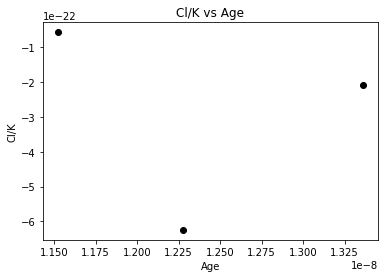

In [100]:
# Crea 'Cl/K vs Age'
plt.scatter(results_data['Age'],results_data['Cl/K'],marker= 'o', color = 'black' )
plt.title('Cl/K vs Age')
plt.xlabel('Age')
plt.ylabel('Cl/K')

Text(0, 0.5, 'Ca/K')

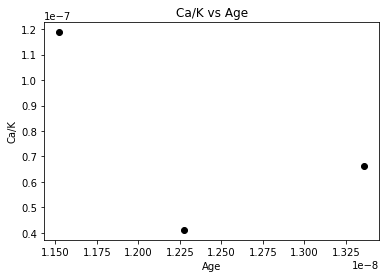

In [101]:
# Crea 'Ca/K vs Age'
plt.scatter(results_data['Age'],results_data['Ca/K'],marker= 'o', color = 'black' )
plt.title('Ca/K vs Age')
plt.xlabel('Age')
plt.ylabel('Ca/K')

Text(0, 0.5, 'Cl/K')

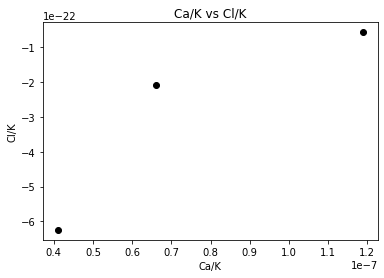

In [102]:
# Crea 'Ca/K vs Cl/K'
plt.scatter(results_data['Ca/K'],results_data['Cl/K'],marker= 'o', color = 'black' )
plt.title('Ca/K vs Cl/K')
plt.xlabel('Ca/K')
plt.ylabel('Cl/K')

In [103]:
# Crea Isocrona '36Ar/39Ar vs 39Ar/40Ar'
x = results_data['39/40'].dropna()
y = results_data['36/40'].dropna()

Text(0, 0.5, '36Ar/39Ar')

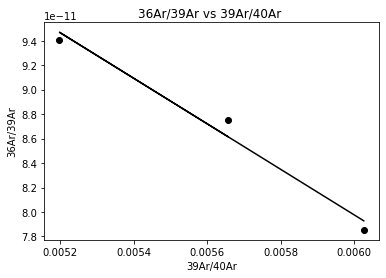

In [104]:
plt.plot(x, y, 'o',color = 'black'),

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b,color = 'black')
plt.title('36Ar/39Ar vs 39Ar/40Ar ')
plt.xlabel('39Ar/40Ar')
plt.ylabel('36Ar/39Ar')


In [105]:
x_intercept = -b/m
print ('x_intercept =',x_intercept )
print ('y_intercept =',b)
print ('slope =',m)

x_intercept = 0.01027946402520813
y_intercept = 1.9156955918598052e-10
slope = -1.8636142771276618e-08


Crea Spectrum Age plot 

In [106]:
# Crea la cumulata dei valori nella colonna '% 39Ar' del dataframe results data
cumulative = results_data['% 39Ar'].cumsum()

In [107]:
cumulative_df = pd.DataFrame(cumulative)
cumulative_df

,% 39Ar
0,34.313432
1,59.583544
2,62.409581
3,67.863038
4,77.313836
5,100.000000


In [108]:
# Crea dataframe Age+2error
age_più_2error_df = pd.DataFrame(results_data['Age+2error'])
age_più_2error_df

,Age+2error
0,NaN
1,NaN
2,1.152467e-08
3,1.335845e-08
4,1.227596e-08
5,NaN


In [109]:
# Crea dataframe Age-2error
age_meno_2error_df = pd.DataFrame(results_data['Age-2error'])
age_meno_2error_df

,Age-2error
0,NaN
1,NaN
2,1.152467e-08
3,1.335845e-08
4,1.227596e-08
5,NaN


In [110]:
# Duplica i valori della cumulata
double_cumulative_df = pd.DataFrame(np.repeat(cumulative_df.values,2,axis=0))
double_cumulative_df.columns = cumulative_df.columns
double_cumulative_df

,% 39Ar
0,34.313432
1,34.313432
2,59.583544
3,59.583544
4,62.409581
5,62.409581
6,67.863038
7,67.863038
8,77.313836
9,77.313836


In [111]:
# Rinomina il database double_cumulative (Cum%39)
double_cumulative_df= double_cumulative_df.rename(columns={"% 39Ar": "Cum%39"})
double_cumulative_df

,Cum%39
0,34.313432
1,34.313432
2,59.583544
3,59.583544
4,62.409581
5,62.409581
6,67.863038
7,67.863038
8,77.313836
9,77.313836


In [112]:
# Cancella l'ultima riga di (Cum%39)
double_cumulative_df=pd.DataFrame(double_cumulative_df.drop(index=9))
double_cumulative_df

,Cum%39
0,34.313432
1,34.313432
2,59.583544
3,59.583544
4,62.409581
5,62.409581
6,67.863038
7,67.863038
8,77.313836
10,100.000000


In [113]:
# Aggiungi "O" alla prima riga di (Cum%39)
double_cumulative_df.loc[-1] = [0]  # adding a row
double_cumulative_df.index = double_cumulative_df.index + 1  # shifting index
double_cumulative_df= double_cumulative_df.sort_index()  # sorting by index
double_cumulative_df


,Cum%39
0,0.000000
1,34.313432
2,34.313432
3,59.583544
4,59.583544
5,62.409581
6,62.409581
7,67.863038
8,67.863038
9,77.313836


In [114]:
# Duplica i valori di (Age+2error)
double_age_più_2error_df = pd.DataFrame(np.repeat(age_più_2error_df.values,2,axis=0))
double_age_più_2error_df.columns = age_più_2error_df.columns
double_age_più_2error_df

,Age+2error
0,NaN
1,NaN
2,NaN
3,NaN
4,1.152467e-08
5,1.152467e-08
6,1.335845e-08
7,1.335845e-08
8,1.227596e-08
9,1.227596e-08


In [115]:
# Duplica i valori di (Age+2error)
double_age_meno_2error_df = pd.DataFrame(np.repeat(age_meno_2error_df.values,2,axis=0))
double_age_meno_2error_df.columns = age_meno_2error_df.columns
double_age_meno_2error_df

,Age-2error
0,NaN
1,NaN
2,NaN
3,NaN
4,1.152467e-08
5,1.152467e-08
6,1.335845e-08
7,1.335845e-08
8,1.227596e-08
9,1.227596e-08


In [116]:
# Unione dei dataframe
double_cumulative_df['Age+2error'] = double_age_più_2error_df['Age+2error']
double_cumulative_df['Age-2error'] = double_age_meno_2error_df['Age-2error']
double_cumulative_df

,Cum%39,Age+2error,Age-2error
0,0.000000,NaN,NaN
1,34.313432,NaN,NaN
2,34.313432,NaN,NaN
3,59.583544,NaN,NaN
4,59.583544,1.152467e-08,1.152467e-08
5,62.409581,1.152467e-08,1.152467e-08
6,62.409581,1.335845e-08,1.335845e-08
7,67.863038,1.335845e-08,1.335845e-08
8,67.863038,1.227596e-08,1.227596e-08
9,77.313836,1.227596e-08,1.227596e-08


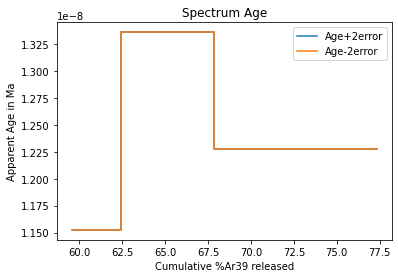

In [117]:
# Spectrum Age
plt.plot(double_cumulative_df ['Cum%39'], double_cumulative_df ['Age+2error'], label = 'Age+2error')
plt.plot(double_cumulative_df ['Cum%39'], double_cumulative_df ['Age-2error'], label = 'Age-2error')
plt.title('Spectrum Age')
plt.xlabel('Cumulative %Ar39 released')
plt.ylabel('Apparent Age in Ma')
plt.legend()